## Practica 1

### Setup

In [82]:
# Librerias generales
library(fda)
# library(tidyverse)

# Funciones auxiliares
source("helpers.R")

# Dispositivos graficos
library(repr)
options(repr.plot.width=20, repr.plot.height=13)
ROWS <- 1
COLS <- 2

### Ejercicio 1.1 (~Kokoszka 1.1)

In [83]:
X <- fda::pinch

T <- dim(X)[1]
N <- dim(X)[2]

SEMILLA <- 1234
LIMITES <- c(0, 300)  # En milisegundos
GRILLA <- seq(LIMITES[1], LIMITES[2], length.out = T) 
# MU <- vector("numeric", T)  # funcion de media
# RO <- 1
# SIGMA <- 1

In [84]:
options(repr.plot.width=20, repr.plot.height=7)
# Muestrario de lineas y colores
N_COLORES = 15
y <- matrix(rep(seq.int(N_COLORES), 2), nrow=2, byrow=T)
matplot(seq.int(2), y, type='l', lwd=2, col=seq.int(N_COLORES))

In [85]:
N_BASES <- 15 # debe ser estrictamente menor a T! por que? Probar con 50
base.bsplines <- create.bspline.basis(rangeval = LIMITES, nbasis = N_BASES, norder = 4)
base.fourier <- create.fourier.basis(rangeval = LIMITES, nbasis = N_BASES)

In [86]:
X.bsp.fd <- smooth.basis(GRILLA, X, base.bsplines)
X.fou.fd <- smooth.basis(GRILLA, X, base.fourier)
# matcov <- resultado$matcov
# gammahat <- resultado$gammahat

In [87]:
muhat.fd <- mean.fd(X.fou.fd$fd)

Los elementos de `muhat.fd$coefs` son efectivamente los _coeficientes_ que acompanian a las funciones de base $\phi_j(t)$, y no los valores de la funcion $x(t)$ representada en dicha base. Para obtener esto ultimo, hace falta una llamada a `eval.fd`, especificando la grilla que se desea.

Una forma de comprobarlo, es representar los mismos datos en dos bases distintas, y ver que la distancia entre los coeficientes para una misma observación es alta, mientras que la distancia para las representaciones creadas por `eval.fd` para la misma observación con distintas bases son casi idénticas cuando `N_BASES` es suficientemente grande.

Además, es evidente de examinar la grilla de coeficientes de un objeto de datos funcionales que los nombres de las filas describen las funciones de la base elegida.

In [88]:
class(X.bsp.fd)

[1] "fdSmooth"

In [89]:
fou.grid <- eval.fd(GRILLA, X.fou.fd$fd)
bsp.grid <- eval.fd(GRILLA, X.bsp.fd$fd)

In [90]:
J <- 6
sqrt(sum((fou.grid[,J] - bsp.grid[,J])**2))

[1] 1.701065

In [91]:
dist(matrix(c(X.fou.fd$fd$coefs[,1], X.bsp.fd$fd$coefs[,1]), nrow=2, byrow=T))
dist(matrix(c(fou.grid[,1], bsp.grid[,1]), nrow=2, byrow=T))

      1
2 65.47

         1
2 0.943591

In [92]:
matplot(GRILLA, X, type='l', xlab='t[ms]', ylab='f(t)', col=8)
lines(GRILLA, rep(0, T), lty=2)
lines(GRILLA, get_muhat(X), col=2, lwd=3)

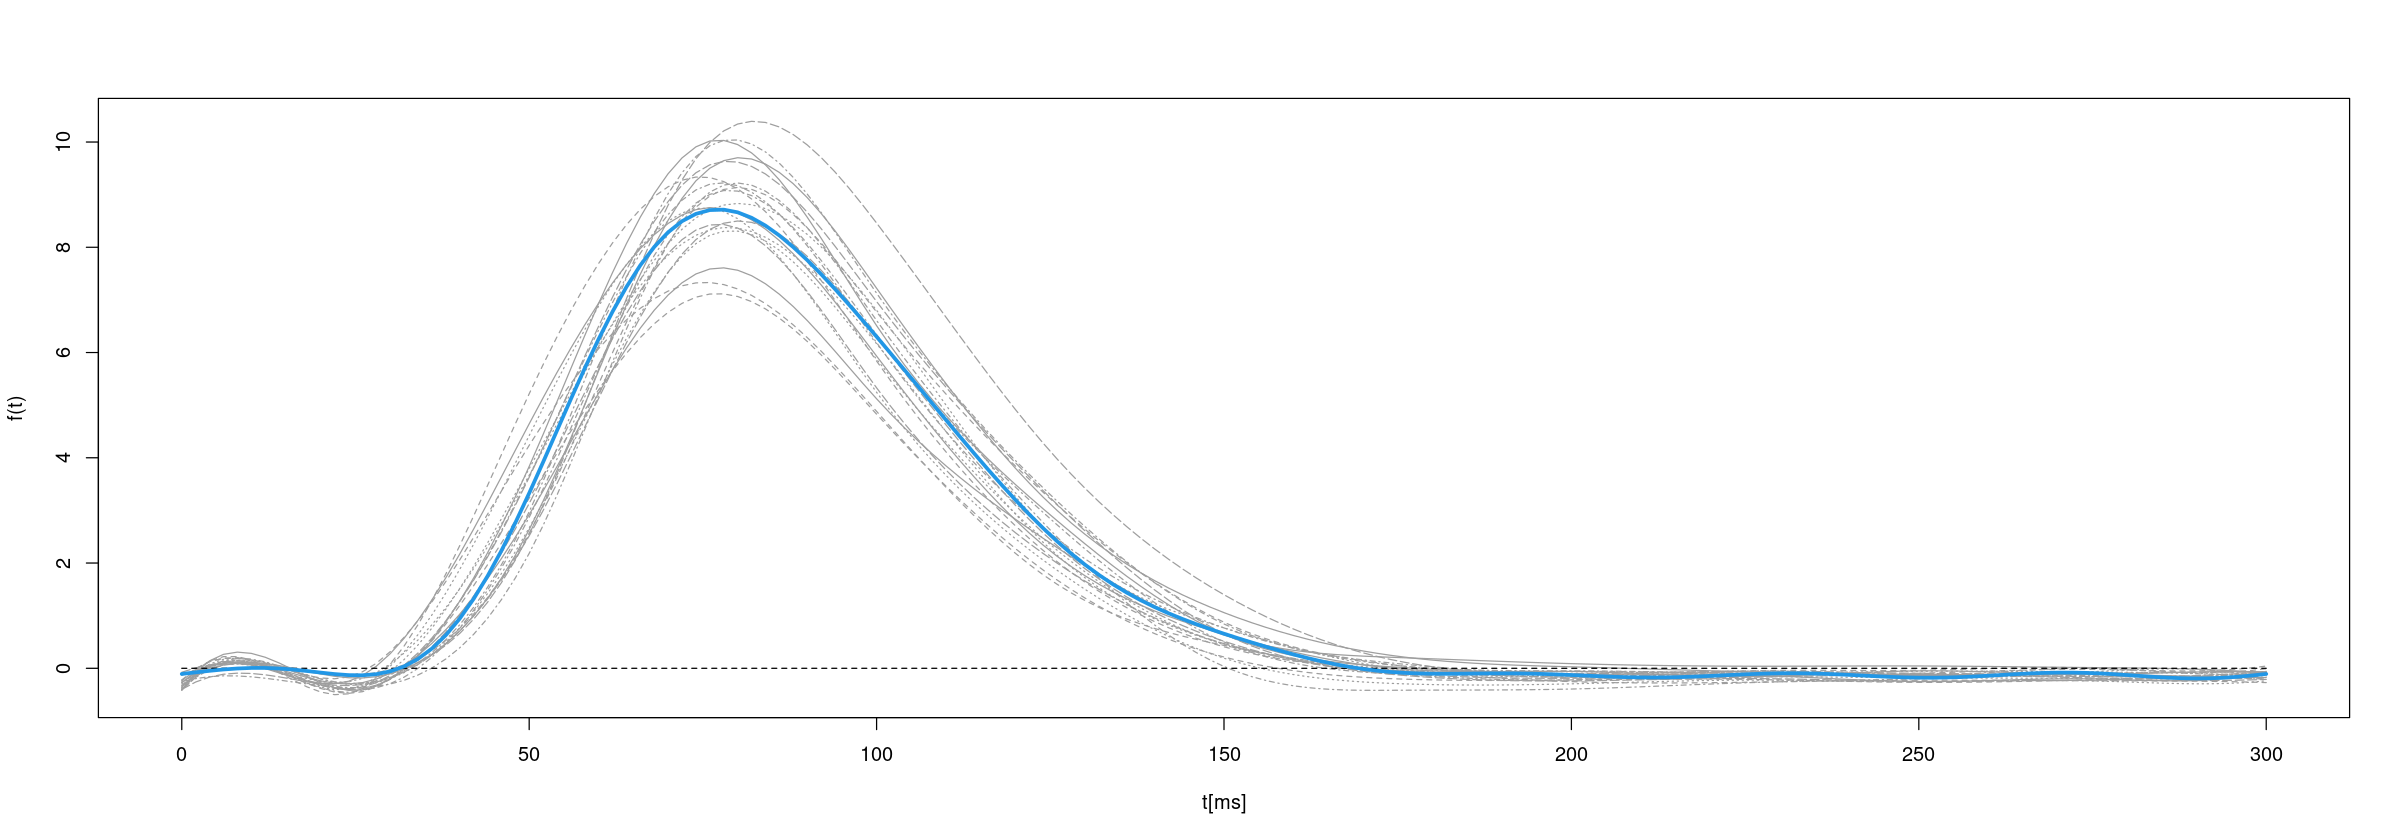

In [93]:
matplot(GRILLA, eval.fd(GRILLA, X.bsp.fd$fd), type='l', xlab='t[ms]', ylab='f(t)', col=8)
lines(GRILLA, rep(0, T), lty=2)
lines(GRILLA, eval.fd(GRILLA, muhat.fd), col=4, lwd=3)
# legend('bottomright', inset=.05, pch=1, horiz=TRUE, col=1:5)

In [94]:
gammahat <- get_gammahat(X)

In [95]:
gammahat.fd <- var.fd(X.bsp.fd$fd)

In [96]:
par(bg = "white")
x <- GRILLA
y <- GRILLA
z <- eval.bifd(GRILLA, GRILLA, gammahat.fd)
nrz <- nrow(z)
ncz <- ncol(z)
# Create a function interpolating colors in the range of specified colors
jet.colors <- colorRampPalette( c("blue", "green") )
# Generate the desired number of colors from this palette
nbcol <- 100
# color <- jet.colors(nbcol)
color <- rev(rainbow(nbcol, start = 0/6, end = 4/6))
# Compute the z-value at the facet centres
zfacet <- z[-1, -1] + z[-1, -ncz] + z[-nrz, -1] + z[-nrz, -ncz]
# Recode facet z-values into color indices
facetcol <- cut(zfacet, nbcol)
persp(x, y, z, col = color[facetcol], phi = 30, theta = -30)

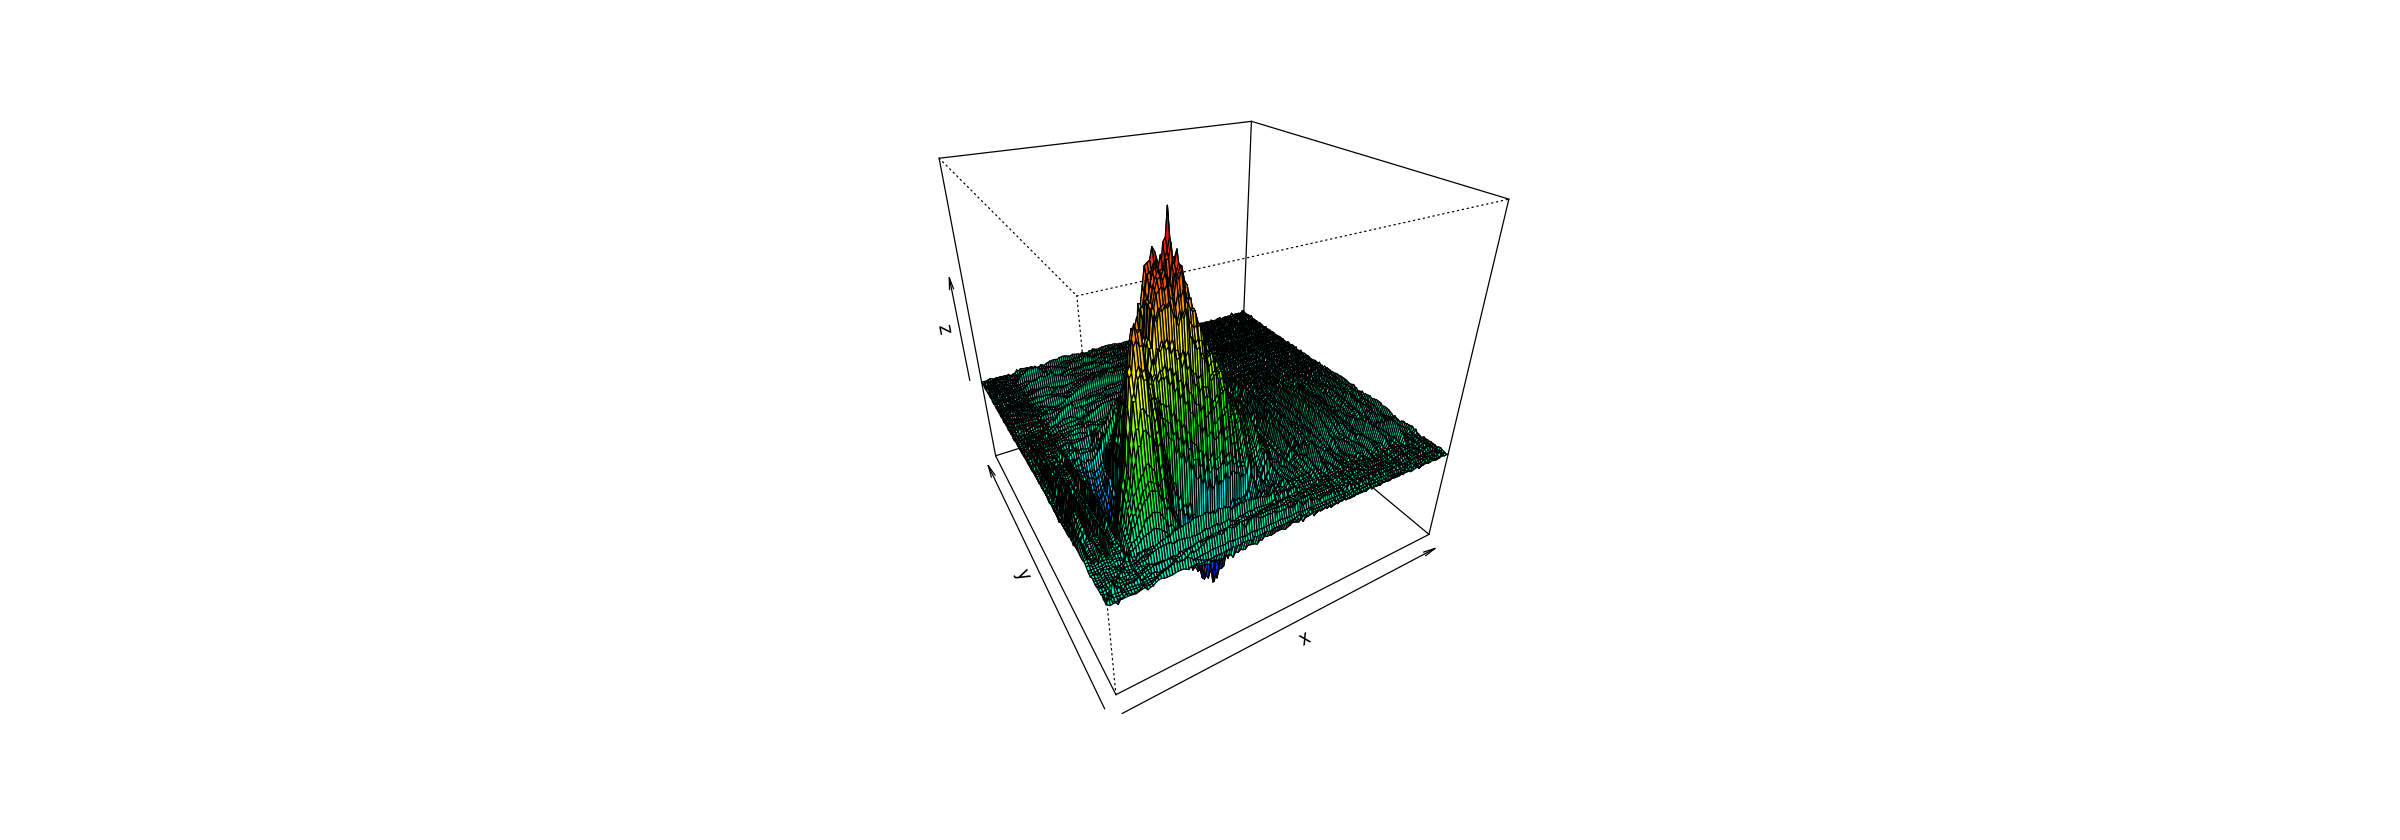

In [97]:
par(bg = "white")
x <- GRILLA
y <- GRILLA
z <- gammahat
nrz <- nrow(z)
ncz <- ncol(z)
# Create a function interpolating colors in the range of specified colors
jet.colors <- colorRampPalette( c("blue", "green") )
# Generate the desired number of colors from this palette
nbcol <- 100
# color <- jet.colors(nbcol)
color <- rev(rainbow(nbcol, start = 0/6, end = 4/6))
# Compute the z-value at the facet centres
zfacet <- z[-1, -1] + z[-1, -ncz] + z[-nrz, -1] + z[-nrz, -ncz]
# Recode facet z-values into color indices
facetcol <- cut(zfacet, nbcol)
persp(x, y, z, col = color[facetcol], phi = 30, theta = -30)

In [98]:
library(stringr)

In [99]:
str_c(colnames(X.pca$harmonics$coefs), round(X.pca$varprop, 2), round(cumsum(X.pca$varprop), 2), sep = " ")

[1] "PC1 0.67 0.67" "PC2 0.25 0.92" "PC3 0.05 0.97" "PC4 0.02 0.99"

In [100]:
paste(round(X.pca$varprop, 2), collapse=" ")

[1] "0.67 0.25 0.05 0.02"

In [101]:
X.pca = pca.fd(X.bsp.fd$fd, nharm=4)
# plot(X.pca)
options(repr.plot.width=20, repr.plot.height=13)
par(mfrow=c(2, 1))
plot(X.pca$harmonics, lwd=3)
legend('bottomright', inset=.05, legend=colnames(X.pca$harmonics$coefs),
                            pch=1, horiz=TRUE, col=1:5)
title(
    paste0(
        "ExpVar: ",
        paste(round(X.pca$varprop, 2), collapse=" "),
        " | CumExpVar: ",
        paste((round(cumsum(X.pca$varprop), 2)), collapse=" ")
    )
)

X.pca.grid <- eval.fd(GRILLA, X.pca$harmonics)
matplot(GRILLA, X.pca.grid[,1:4], type='l', xlab='Years', ylab='rate', col=1:5)
lines(GRILLA, rep(0, T), lty=2)
legend('bottomright', inset=.05, legend=c("PC1", "PC2", "PC3", "PC4"), 
                            pch=1, horiz=TRUE, col=1:5)

[1] "done"

In [105]:
class(X.pca$harmonics)

[1] "fd"

In [106]:
# Esto es literalmente equivalente a plotear
# >>> plot(X.pca$harmonics, lwd=3)
# pero compatible con las otras maneras de calcular autoelementos


In [107]:
diag(crossprod(X.pca.grid))

PC1       PC2       PC3       PC4 
0.5000145 0.5000305 0.5006473 0.5005320

In [111]:
options(repr.plot.width=20, repr.plot.height=7)

muhat <- get_muhat(X)
gammahat <- get_gammahat(X)
# Elegir signo de todos los autovectores de manera que tengan producto escalar positivo con muhat y norma 1.
eig <- eigen(gammahat)
eig$vectors <- apply(eig$vectors, COLS, function (x) {
        x * 
        sqrt(T - 1) * # Norma 1 si los datos vienen de grilla equiespaciada en 0, 1(x * muhat))
        ifelse(sum(x * muhat) >= 0, 1, -1)
    }
)
vals <- eigen(gammahat)$values[1:4]
matplot(GRILLA, eig$vectors[,1:4], 'l')
title(
    paste0(
        "ExpVar: ",
        paste(round(vals / sum(vals), 2), collapse=" "),
        " | CumExpVar: ",
        paste((round(cumsum(vals) / sum(vals), 2)), collapse=" ")
    )
)

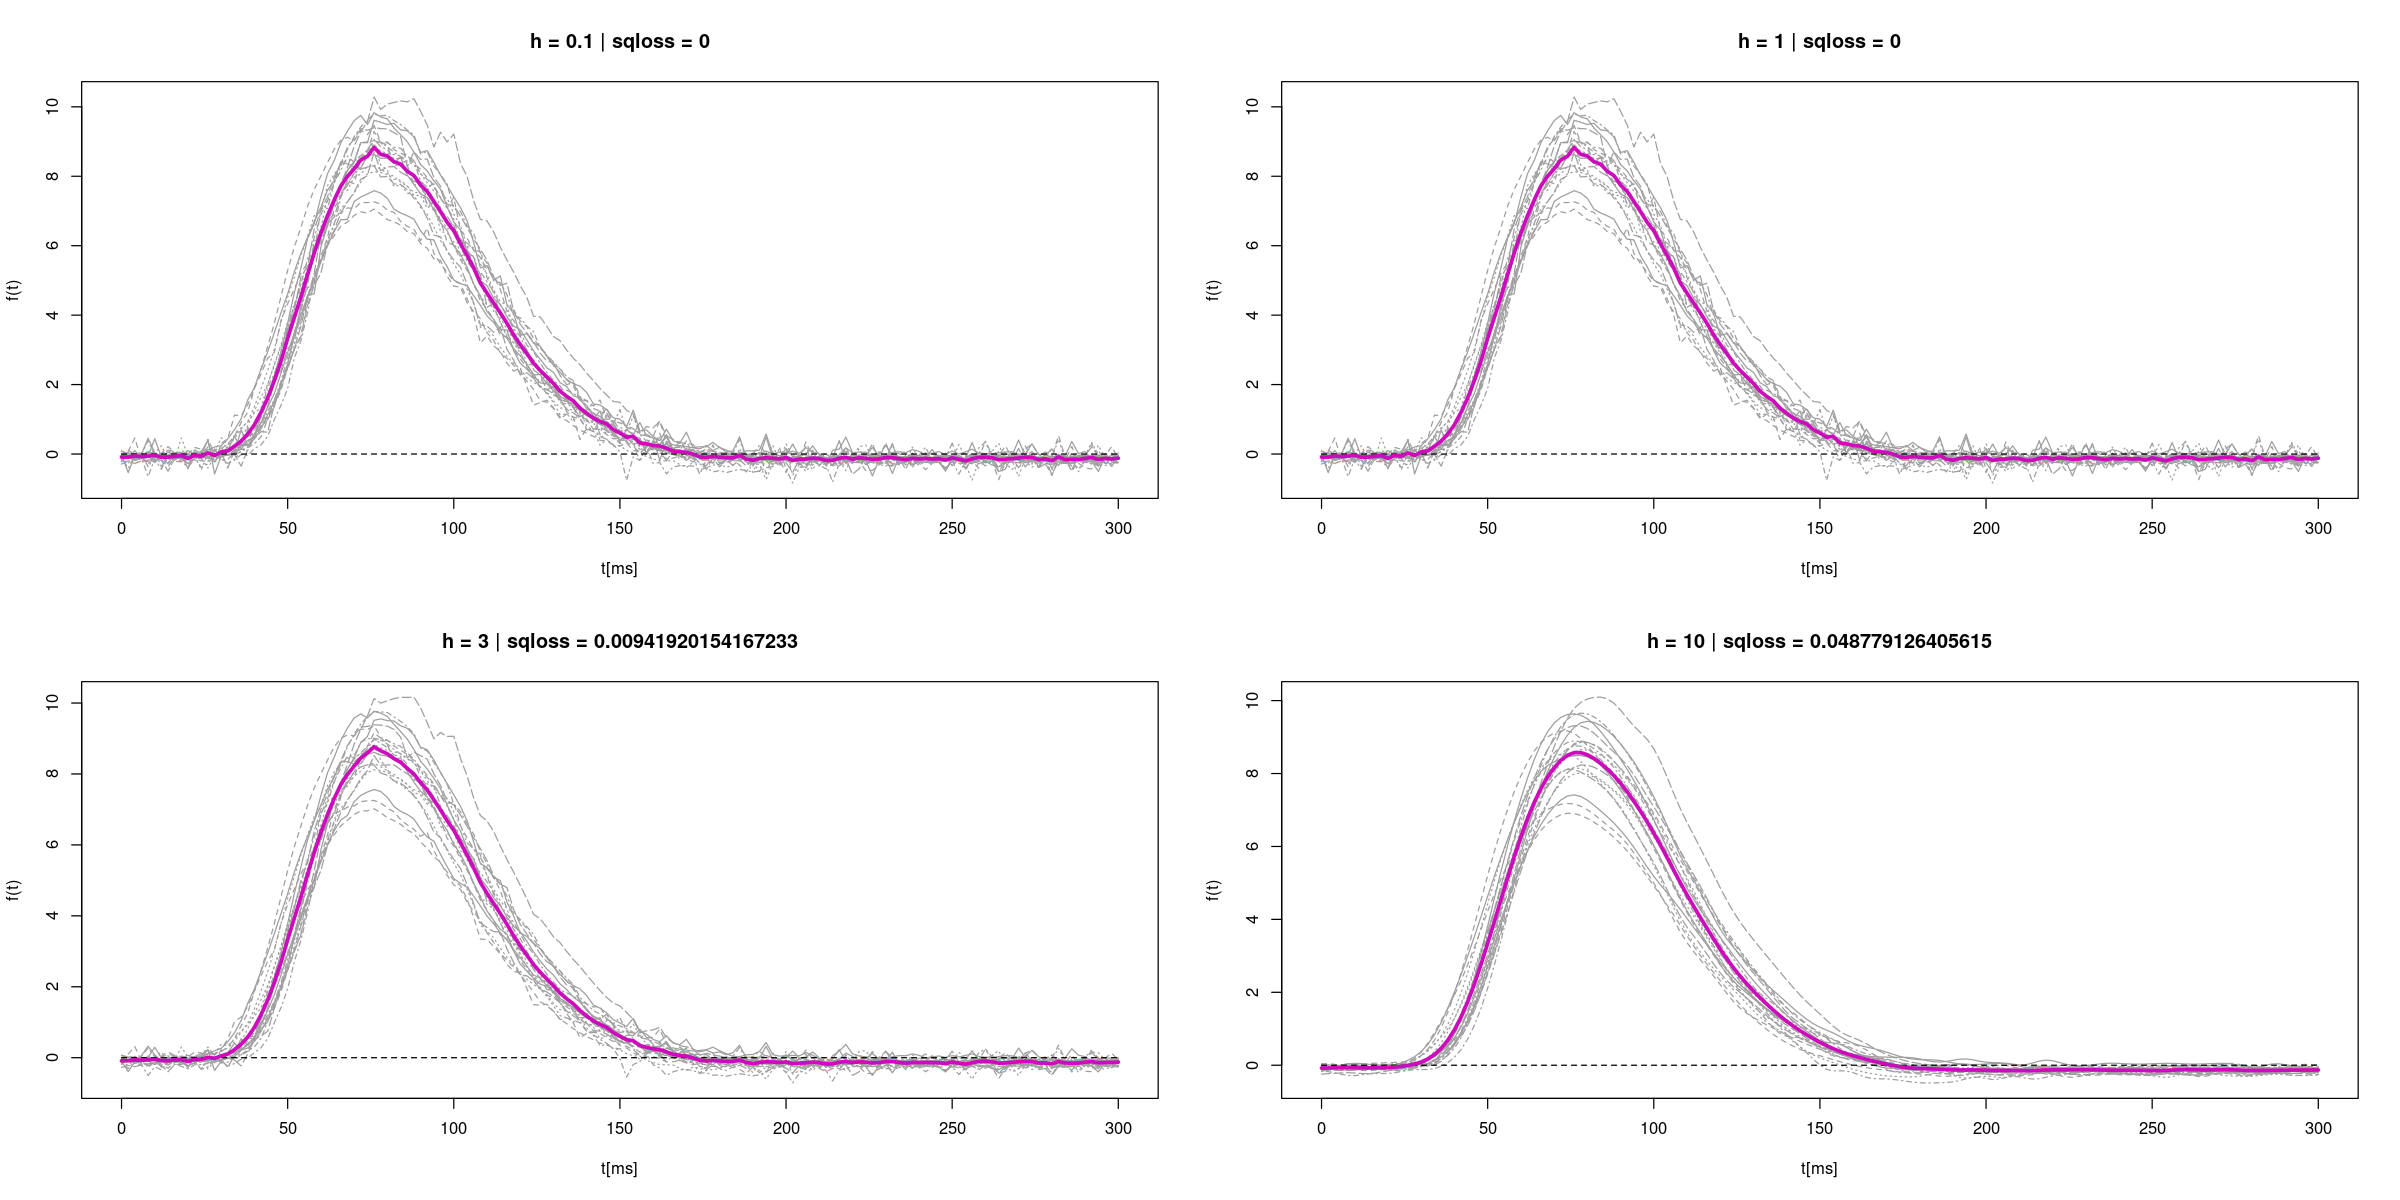

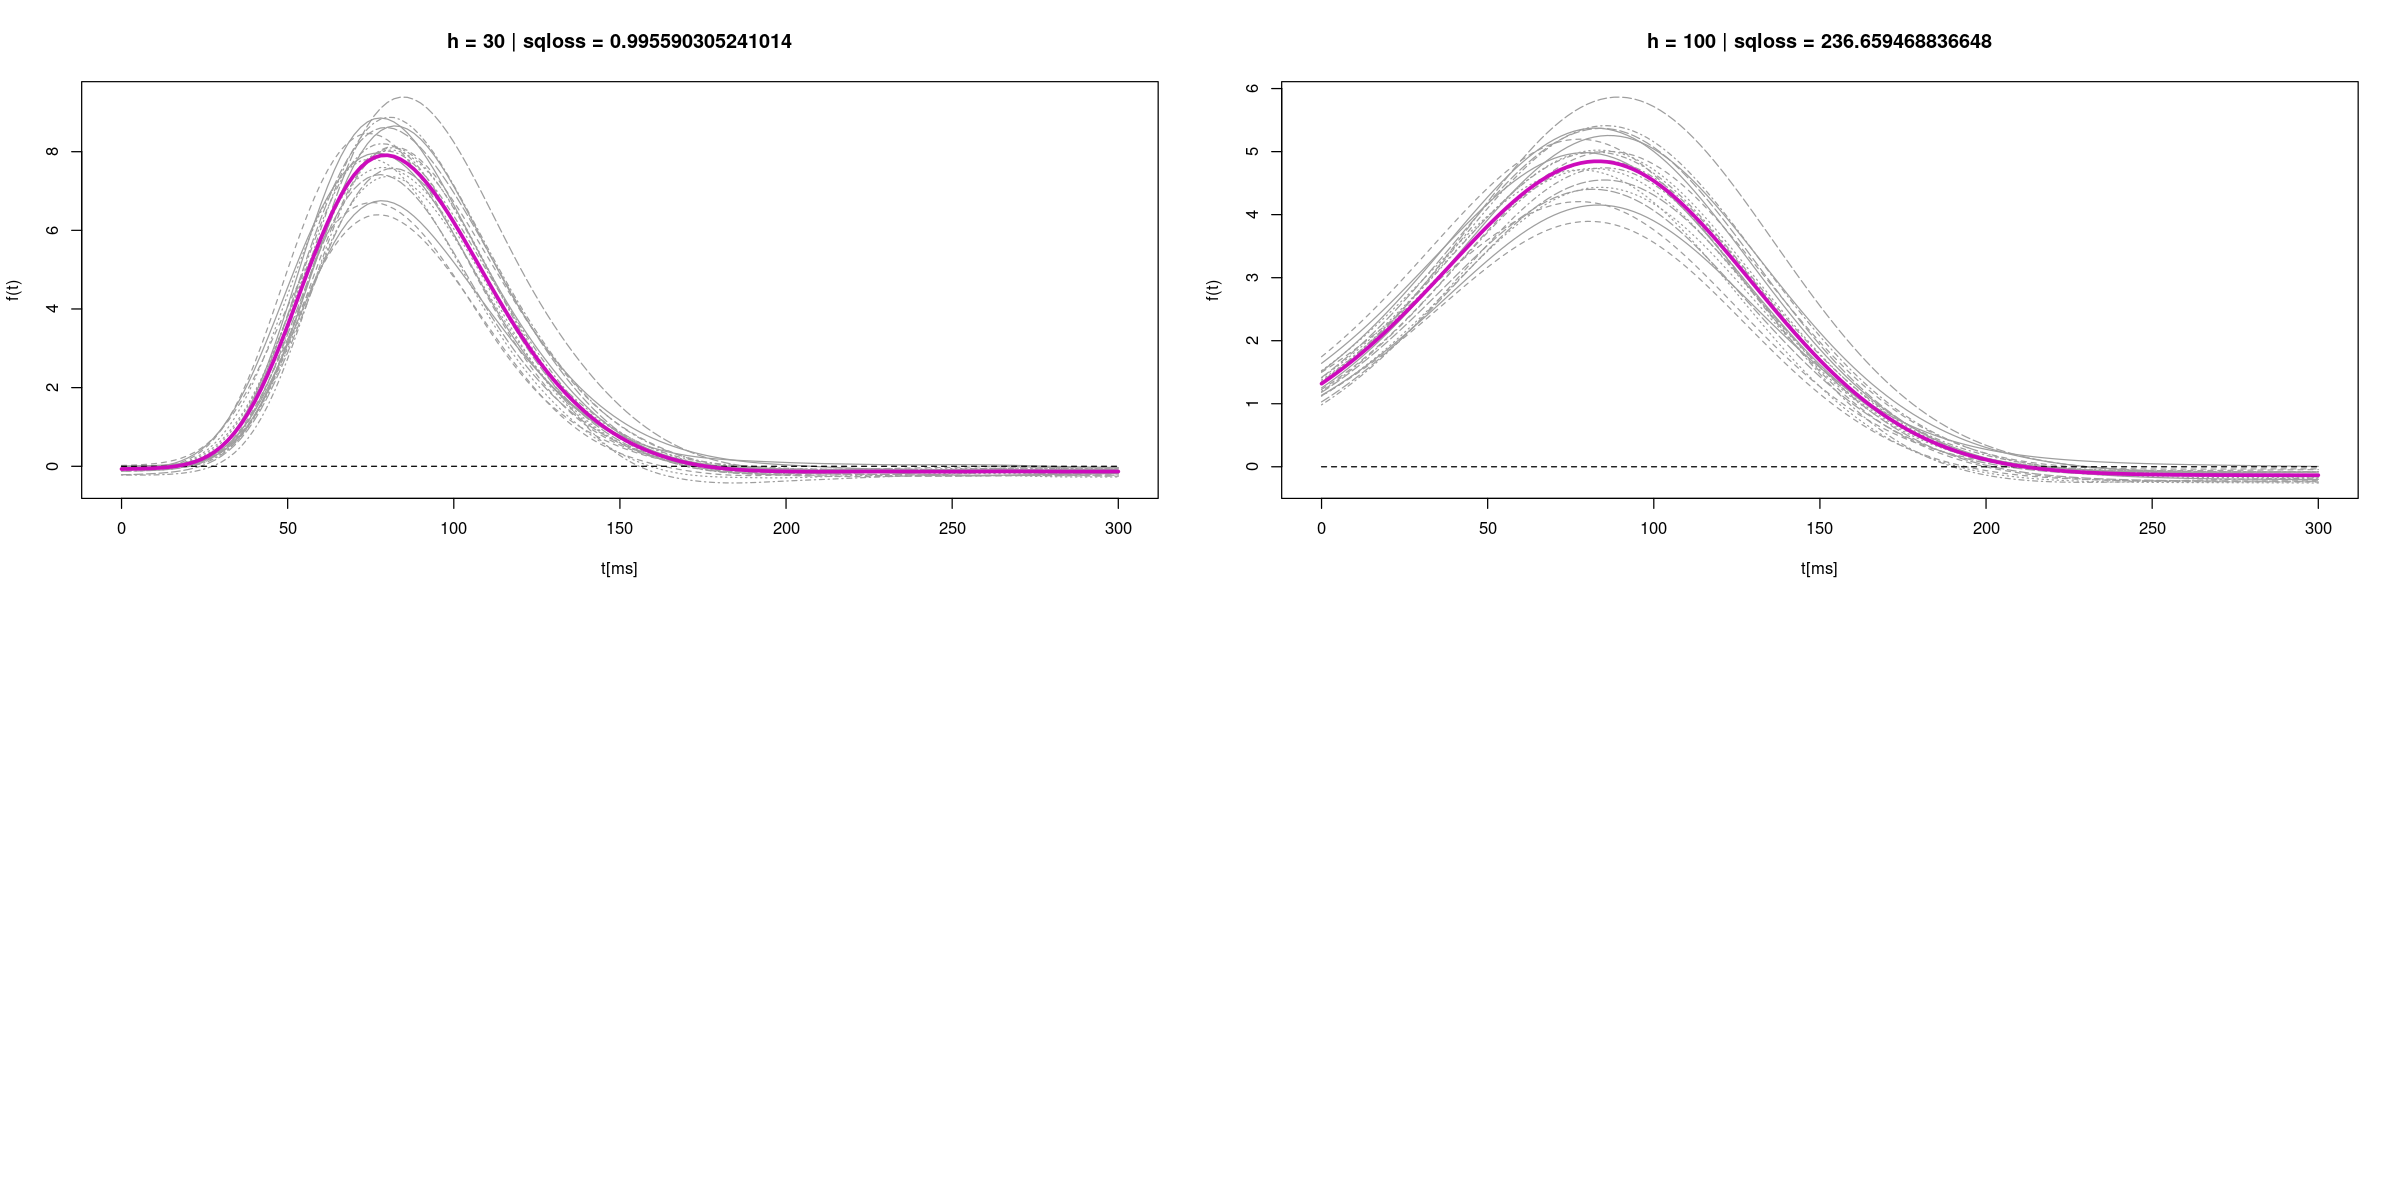

In [116]:
options(repr.plot.width=20, repr.plot.height=10)
Xplot <- function(x, y, n=dim(X)[2]) {
    matplot(x, y[,1:n], type='l', xlab='t[ms]', ylab='f(t)', col=8)
    lines(x, rep(0, dim(y)[1]), lty=2)
    lines(x, get_muhat(y), col=6, lwd=3)}

HS <- c(0.1, 1, 3, 10, 30, 100)
NUCLEO <- "normal"
par(mfrow=c(2,2))
for (h in HS) {
    X.ks <- apply(X, COLS, function(x) { ksmooth(GRILLA, x, NUCLEO, bandwidth=h)$y })
    Xplot(GRILLA, X.ks)
    title(paste0("h = ", h, " | sqloss = ", sqrt(sum(X - X.ks)**2)))
}

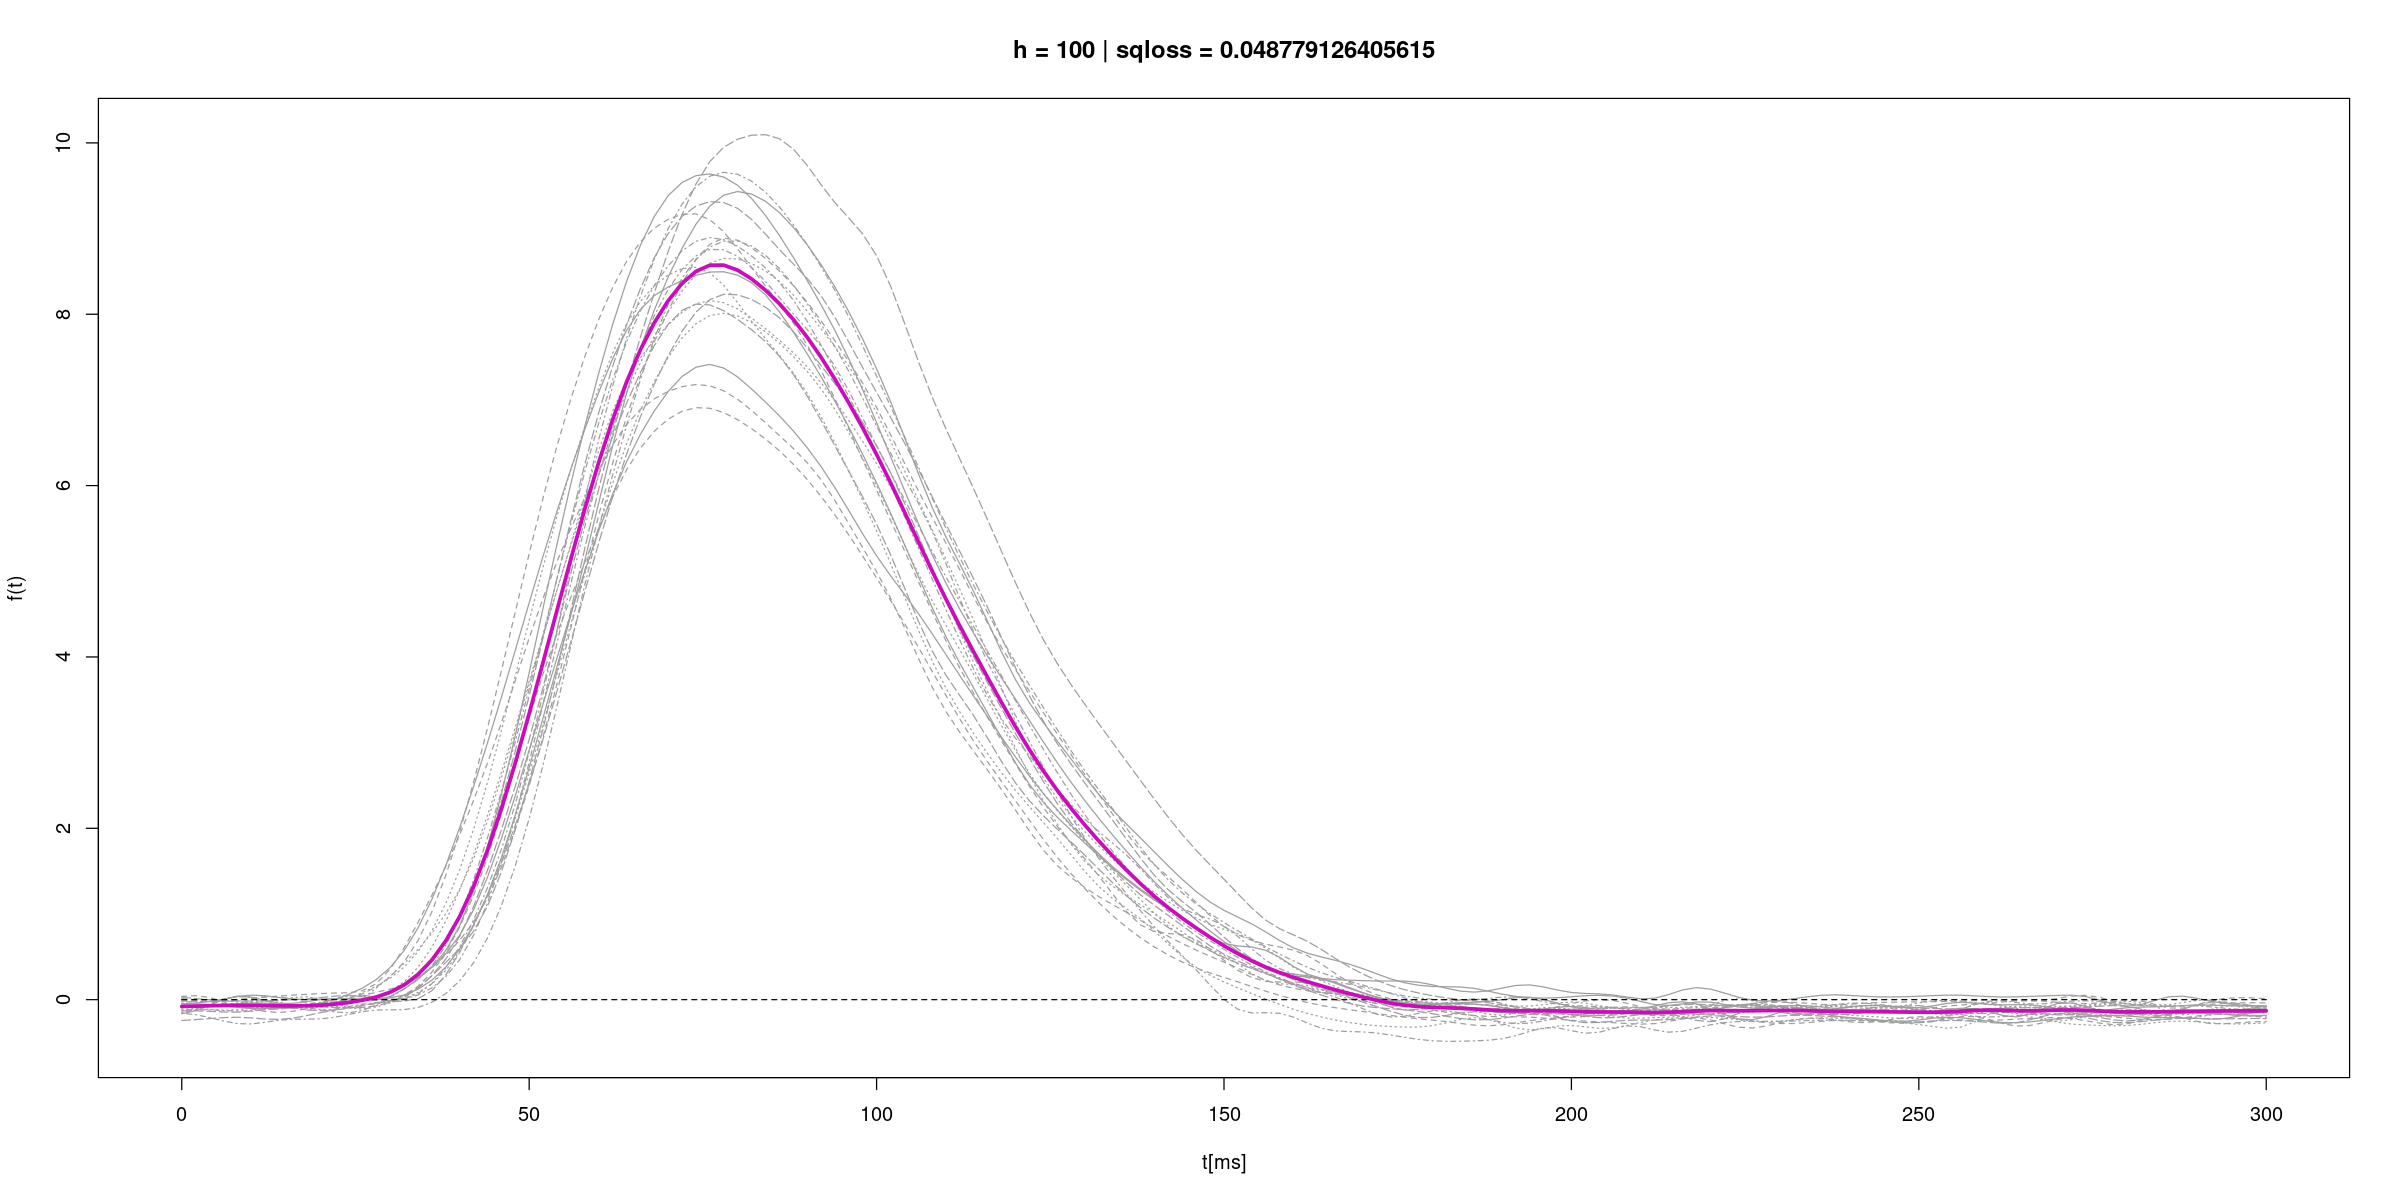

In [117]:
X.ks <- apply(X, COLS, function(x) { ksmooth(GRILLA, x, NUCLEO, bandwidth=10)$y })
Xplot(GRILLA, X.ks)
title(paste0("h = ", h, " | sqloss = ", sqrt(sum(X - X.ks)**2)))


[1] "done"

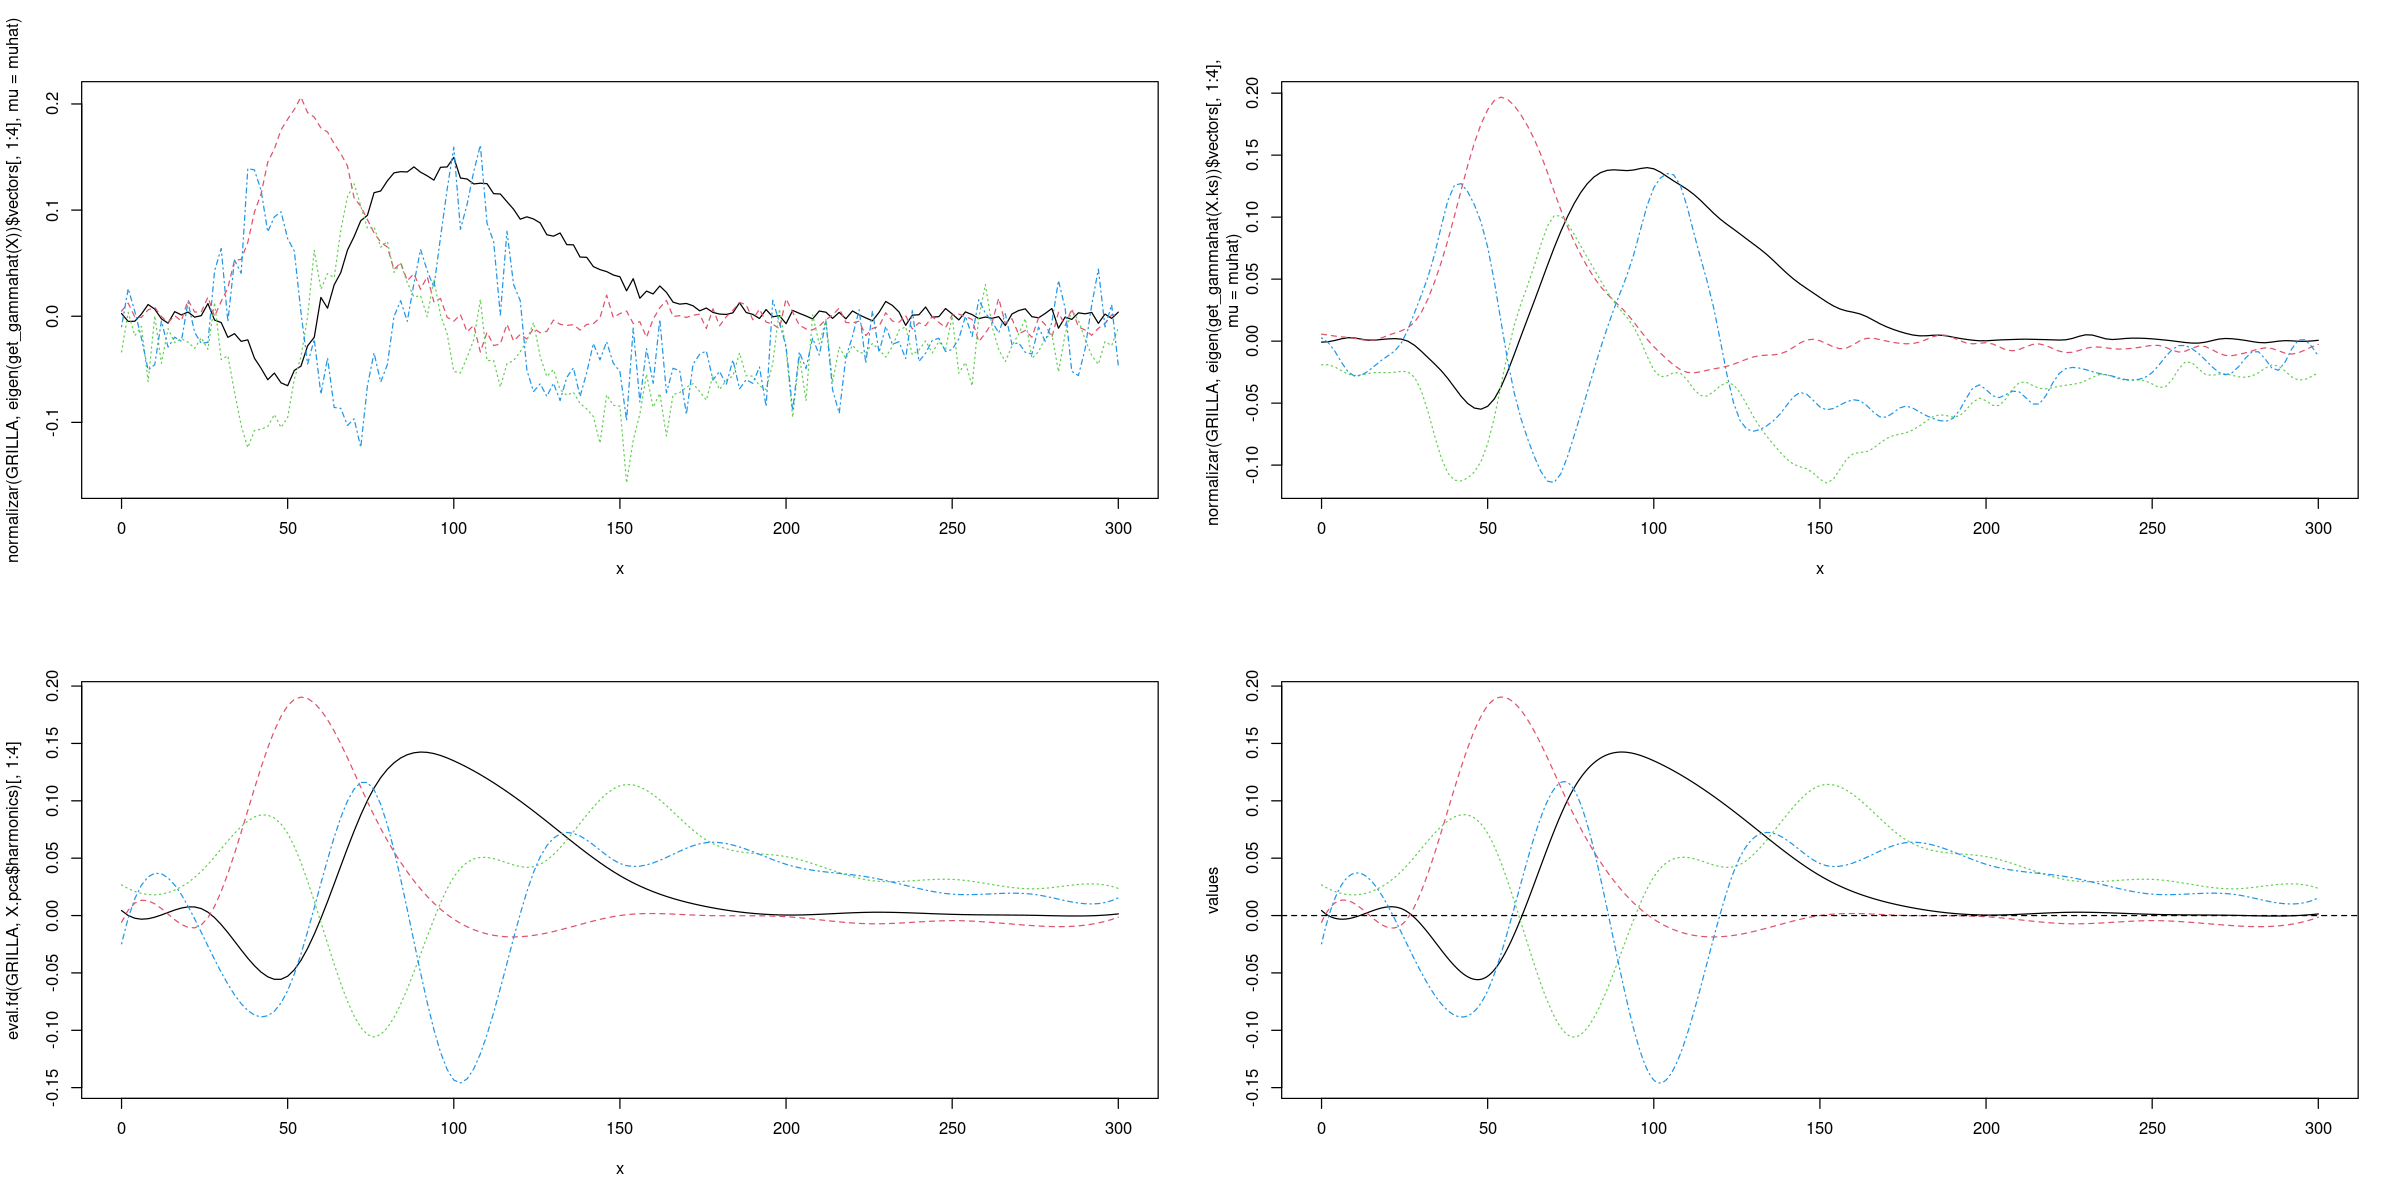

In [120]:
# TODO:
# - matchear escala
# - calcular varprop b
muhat.ks <- get_muhat(X.ks)
gammahat.ks <- get_gammahat(X.ks)
# Elegir signo de todos los autovectores de manera que tengan producto escalar positivo con muhat y norma 1.
normalizar <- function(x, ys, mu=NULL) {
    n <- length(x)
    if (is.null(mu)) {
        mu <- get_muhat(ys)
    }
    apply(ys, COLS,
        function (y) {
            y * 
            sqrt((n - 1) / (x[n] - x[1])) * # Norma 1 si los datos vienen de grilla equiespaciada en 0, 1(x * muhat))
            ifelse(sum(y * mu) >= 0, 1, -1)  # Elijo el signo de manera que <\phi_j, \mu> >= 0 : c/PC este "alineada" con \mu
        }
    )
}

eig <- eigen(gammahat.ks)

par(mfrow=c(2, 2))
muhat <- get_muhat(X)
matplot(GRILLA, normalizar(GRILLA, eigen(get_gammahat(X))$vectors[,1:4], mu=muhat), 'l')
matplot(GRILLA, normalizar(GRILLA, eigen(get_gammahat(X.ks))$vectors[,1:4], mu=muhat), 'l')
matplot(GRILLA, eval.fd(GRILLA, X.pca$harmonics)[,1:4], 'l')
plot(X.pca$harmonics[1:4])

### Ejercicio 1.2 (~Kokoszka 1.4 c/!= dataset)

2. Considere el conjunto de datos CanadianWeather de la librerı́a fda y los promedios mensuales de las 35 estaciones, CanadianWeather$monthlyTemp.

(a) Grafique las curvas junto son el estimador μ de su media.

(b) Grafique la superficie γ(t, s).

(c) Realice el boxplot funcional de los datos e identifique los datos atı́picos

(d) Realice los boxplots puntuales correspondientes a cada mes. Qué diferencias observa. Comente.

(e) Use el boxplot funcional para mostrar 3 regiones que correspondan niveles 30, 60 y 90%,
usando un color más oscuro para la región central 30% y colores más claros para 60 y
90%.

In [161]:
X <- fda::CanadianWeather$monthlyTemp
T <- dim(X)[1]
N <- dim(X)[2]
SEMILLA <- 1234
LIMITES <- c(0, 1)  # En milisegundos
GRILLA <- seq(LIMITES[1], LIMITES[2], length.out = T) 
# MU <- vector("numeric", T)  # funcion de media
# RO <- 1
# SIGMA <- 1

In [165]:
N_BASES <- 11 # debe ser estrictamente menor a T! por que? Probar con 50
base <- create.fourier.basis(rangeval = LIMITES, nbasis = N_BASES)

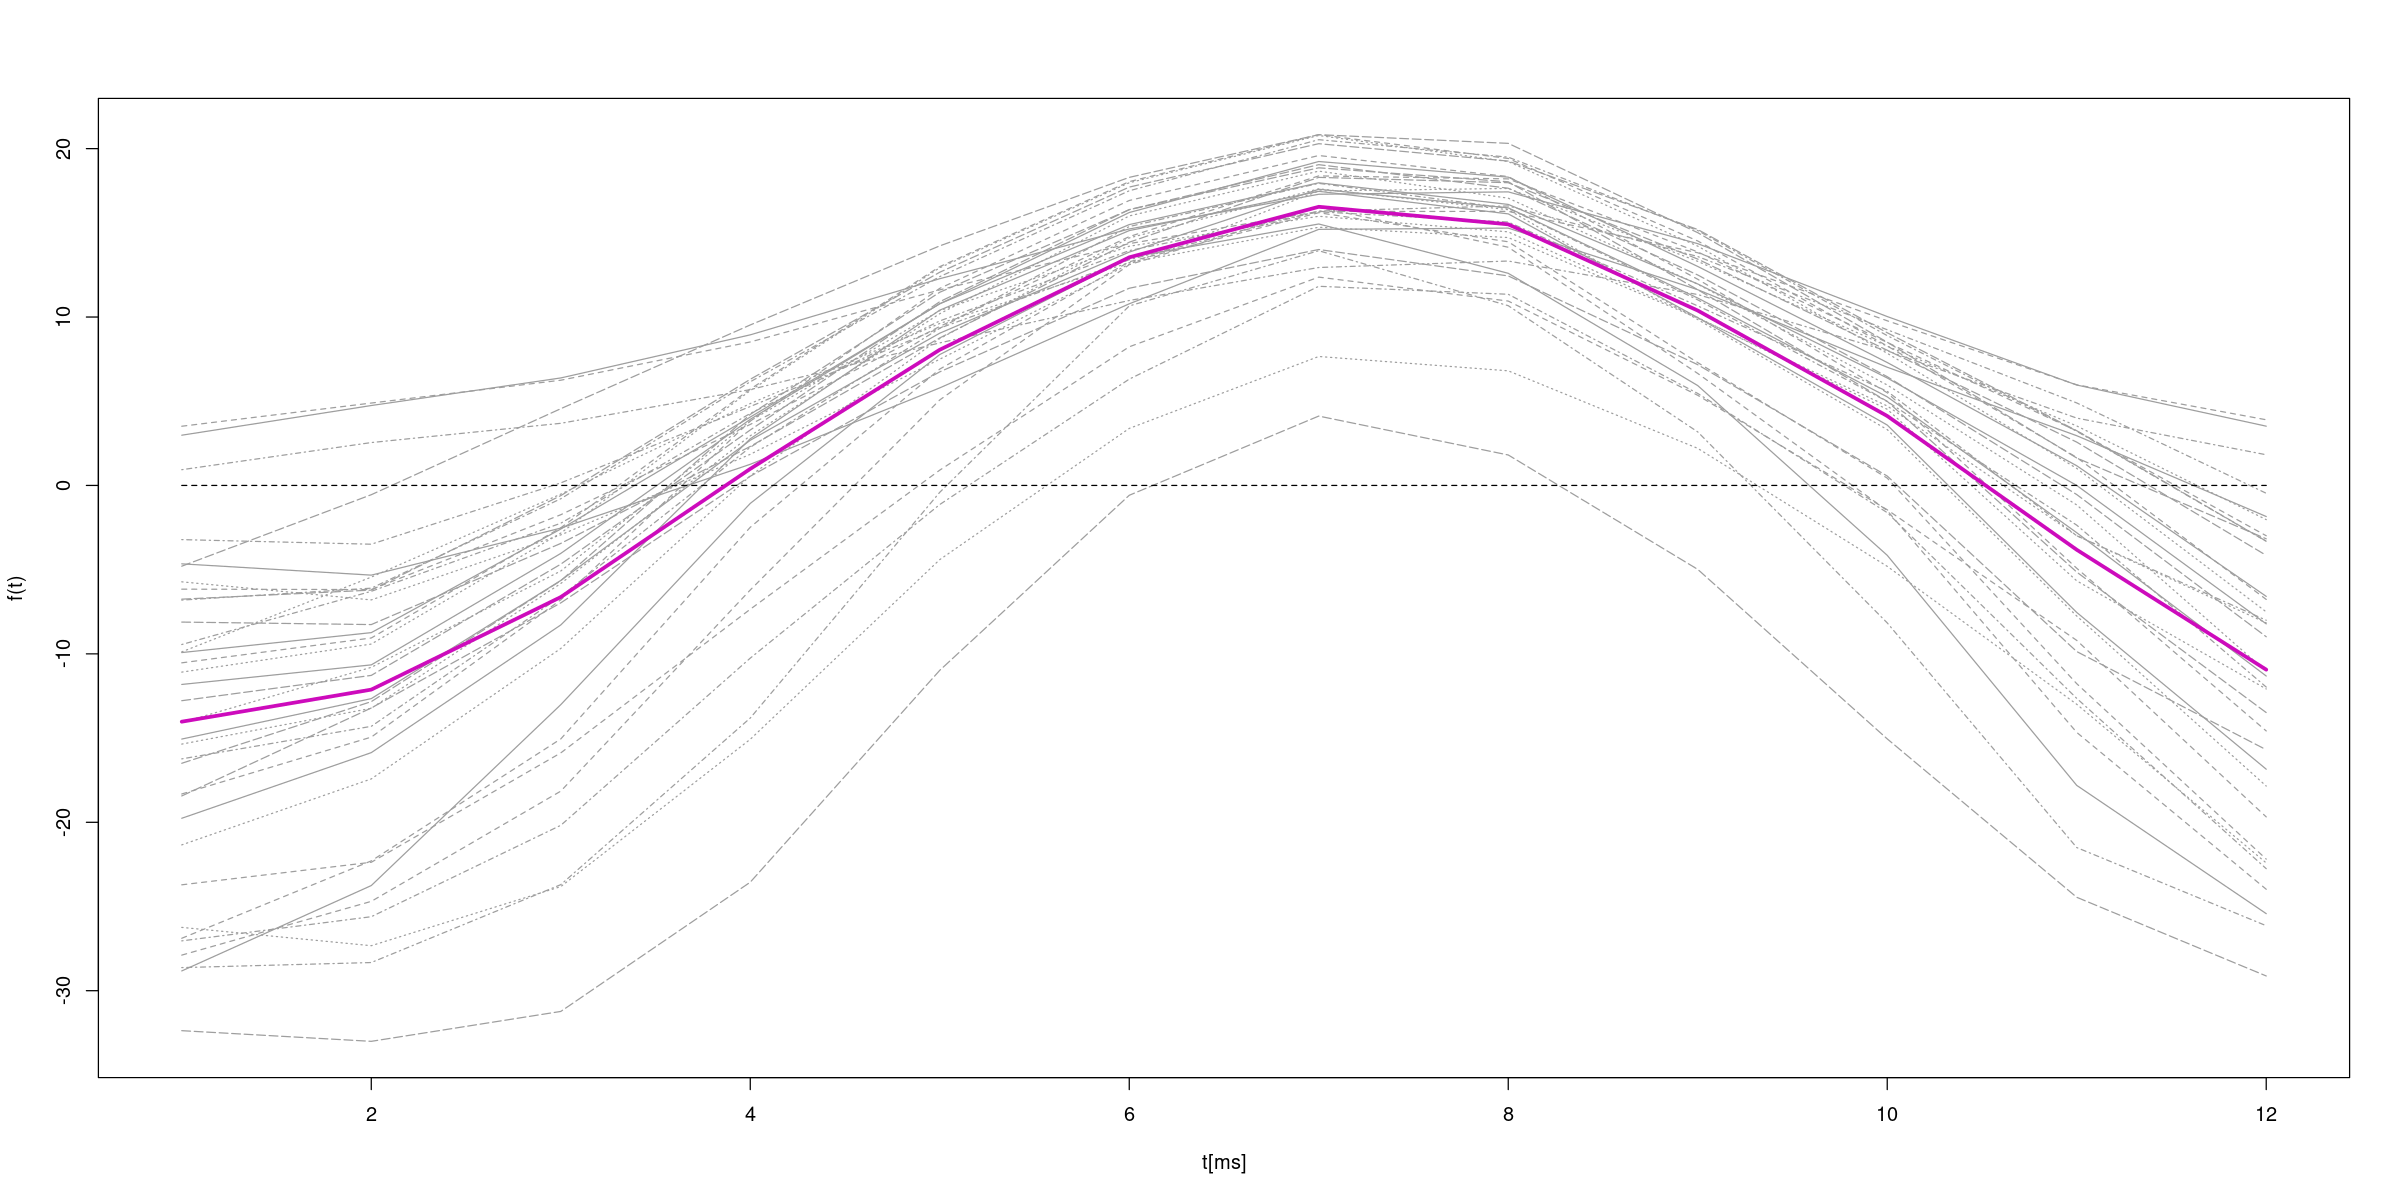

In [136]:
muhat <- get_muhat(X)
Xplot(GRILLA, X)

In [167]:
X.fd <- smooth.basis(GRILLA, X, base)

In [168]:
muhat.fd <- mean.fd(X.fou.fd$fd)

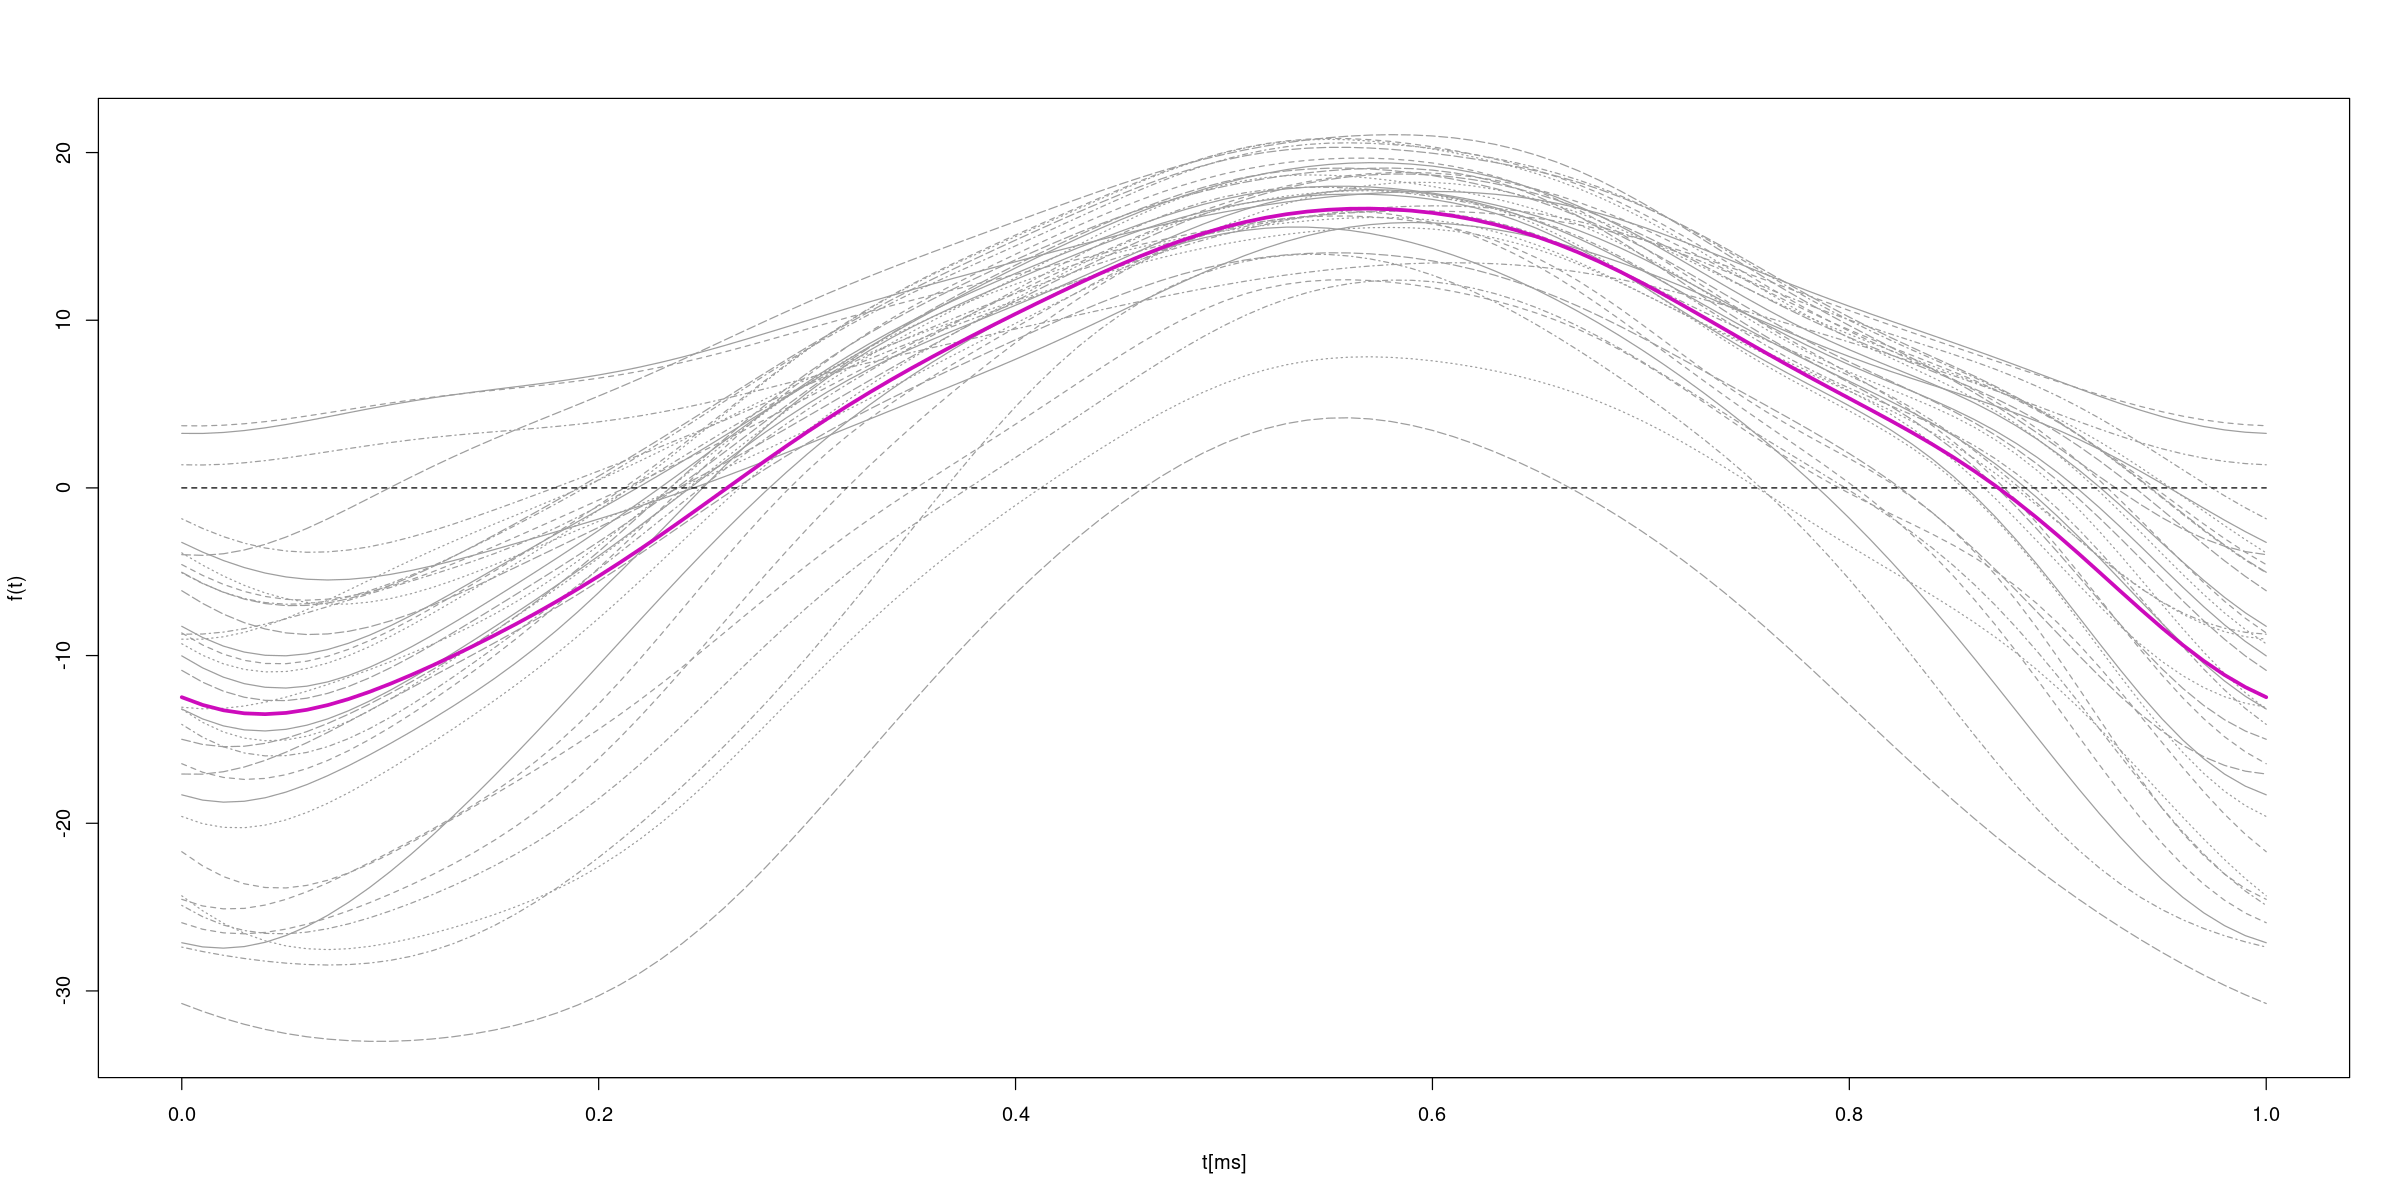

In [174]:
GRILLA_DENSA <- seq(0, 1, length.out=101)
X.fd.grid <- eval.fd(GRILLA_DENSA, X.fd$fd)
Xplot(GRILLA_DENSA, X.fd.grid)

In [200]:
N_COLORES <- 100
jet_colors <- colorRampPalette( c("blue", "green") )
jet_color <- jet.colors(N_COLORES)
rainbow_color <- rev(rainbow(N_COLORES, start = 0/6, end = 4/6))

gammaplot <- function(x, y, z, color=NULL, ...) {
    par(bg = "white")
    nrz <- nrow(z)
    ncz <- ncol(z)
    # Compute the z-value at the facet centres
    zfacet <- z[-1, -1] + z[-1, -ncz] + z[-nrz, -1] + z[-nrz, -ncz]
    # Recode facet z-values into color indices
    facetcol <- cut(zfacet, nbcol)
    if (is.null(color)) {
        facet_colors = NULL
    } else {
        facet_colors = color
    }
    persp(x, y, z, col = facet_colors[facetcol], ...)
}

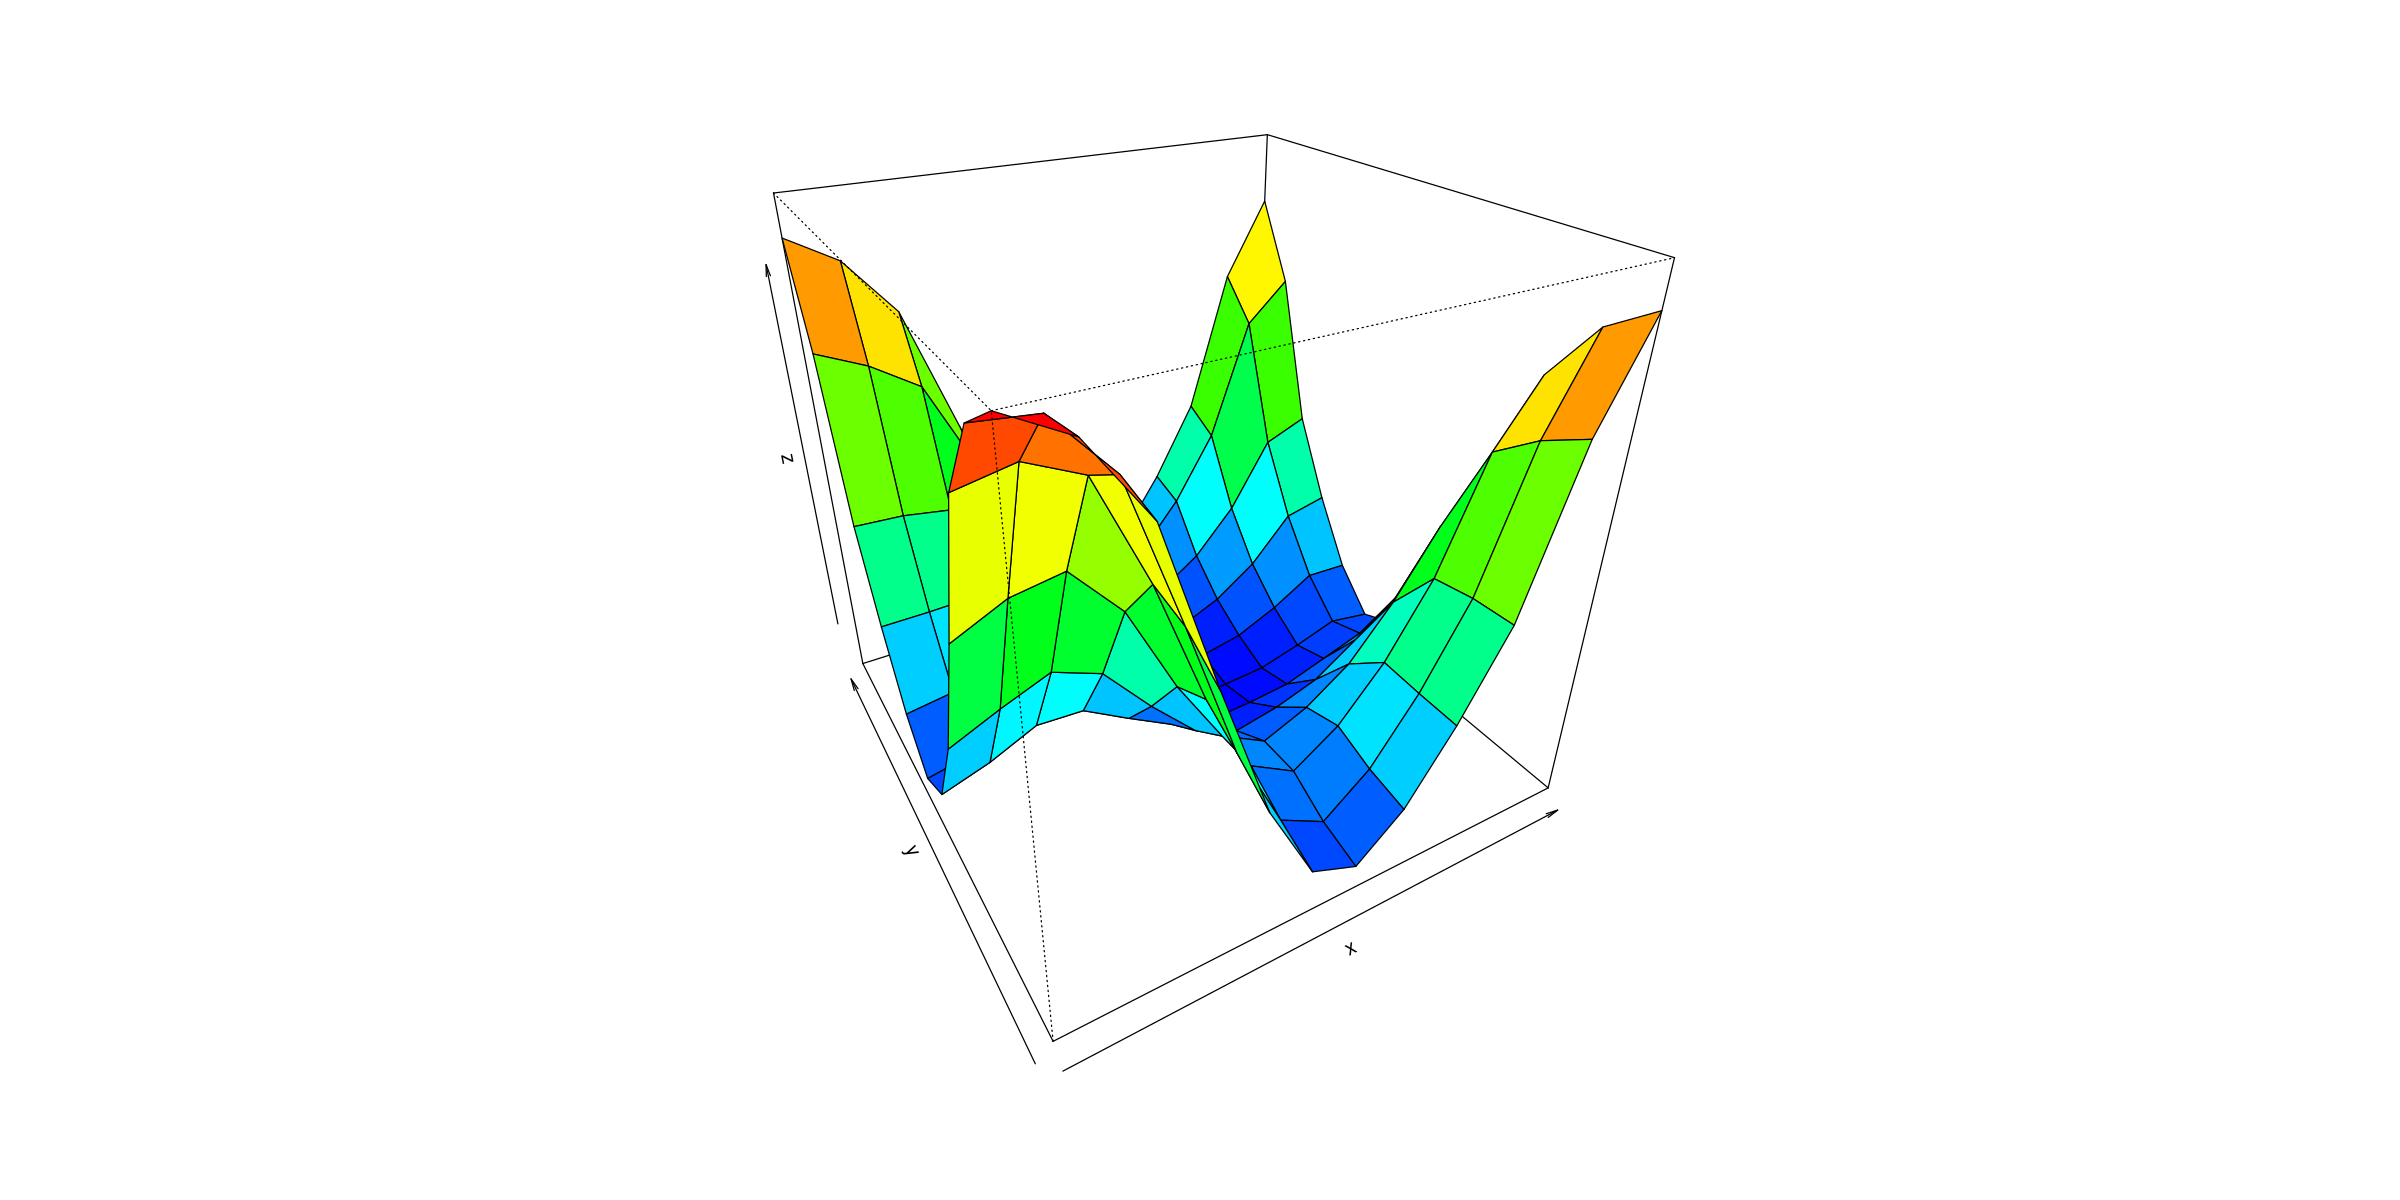

In [206]:
paleta <- colorRampPalette( c("blue", "red") )(30)
gammaplot(GRILLA, GRILLA, gammahat, color=rainbow_color, phi = 30, theta = -30)

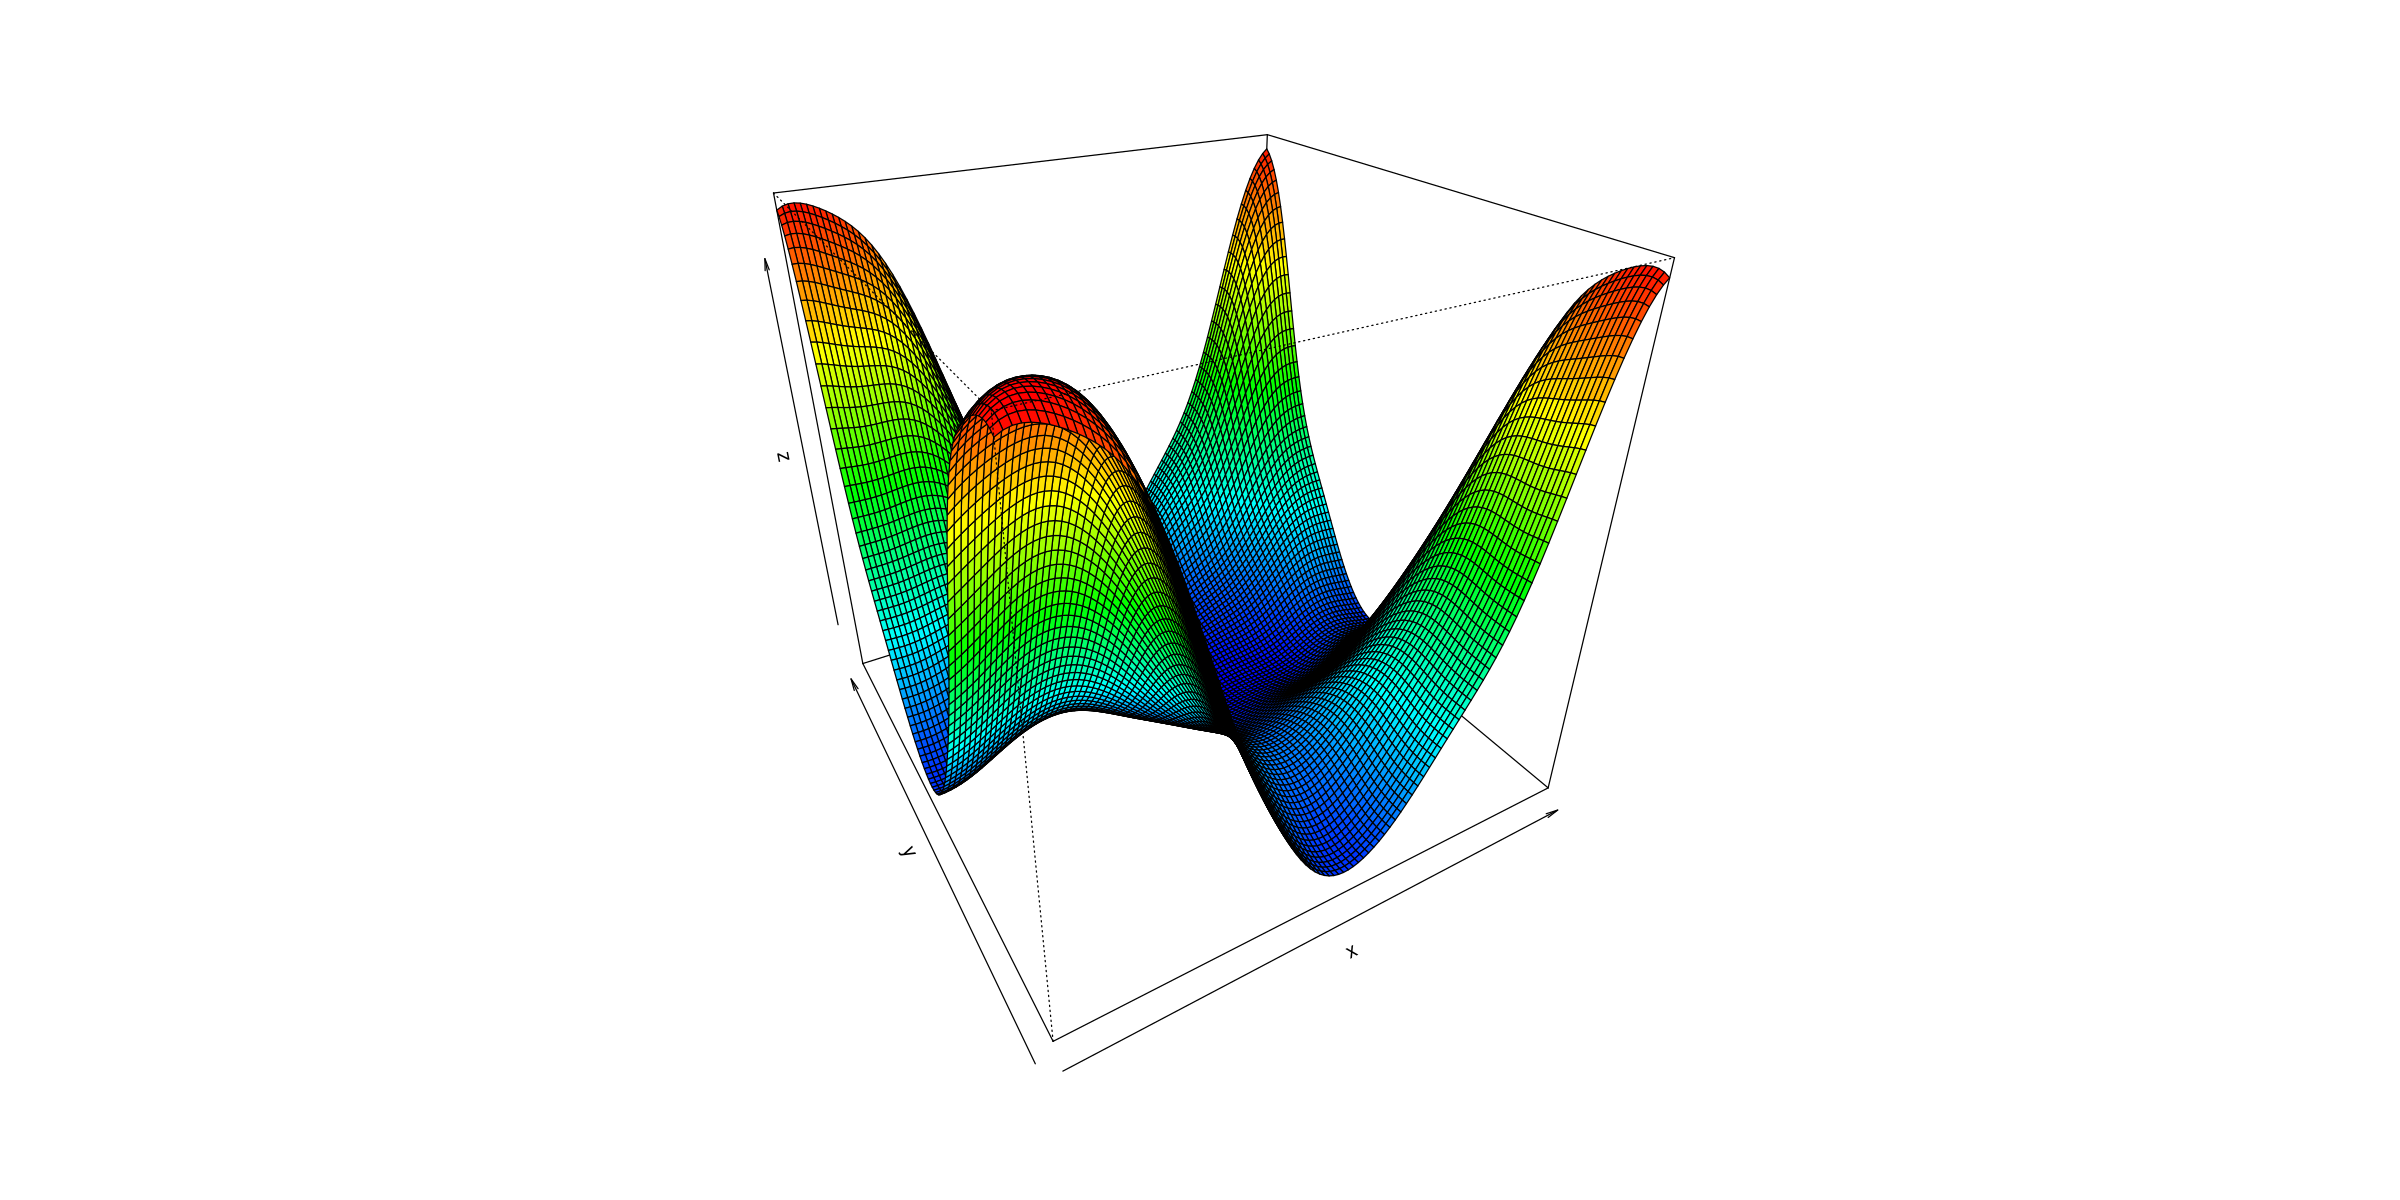

In [207]:
# Ahora para la gamma estimada sobre la base de fourier
gammaplot(
    GRILLA_DENSA,
    GRILLA_DENSA,
    eval.bifd(GRILLA_DENSA, GRILLA_DENSA, var.fd(X.fd$fd)),
    color=rainbow_color, phi = 30, theta = -30
)

In [209]:
GRILLA

[1] 0.00000000 0.09090909 0.18181818 0.27272727 0.36363636 0.45454545
 [7] 0.54545455 0.63636364 0.72727273 0.81818182 0.90909091 1.00000000

$depth
  St. Johns     Halifax      Sydney    Yarmouth  Charlottvl Fredericton 
 0.39520308  0.41610644  0.42941176  0.35182073  0.47955182  0.46400560 
Scheffervll      Arvida Bagottville      Quebec  Sherbrooke    Montreal 
 0.29229692  0.51330532  0.51596639  0.49061625  0.51848739  0.32013305 
     Ottawa     Toronto      London  Thunderbay    Winnipeg     The Pas 
 0.37759104  0.28907563  0.27268908  0.53487395  0.43823529  0.45616246 
  Churchill      Regina  Pr. Albert Uranium Cty    Edmonton     Calgary 
 0.22745098  0.47545518  0.48067227  0.38515406  0.51120448  0.50350140 
   Kamloops   Vancouver    Victoria  Pr. George  Pr. Rupert  Whitehorse 
 0.19296218  0.23165266  0.24691877  0.45420168  0.30980392  0.40420168 
     Dawson Yellowknife     Iqaluit      Inuvik    Resolute 
 0.31316527  0.31246499  0.16806723  0.17058824  0.05714286 

$outpoint
[1]  7 19 32 33 34 35

$medcurve
Thunderbay 
        16

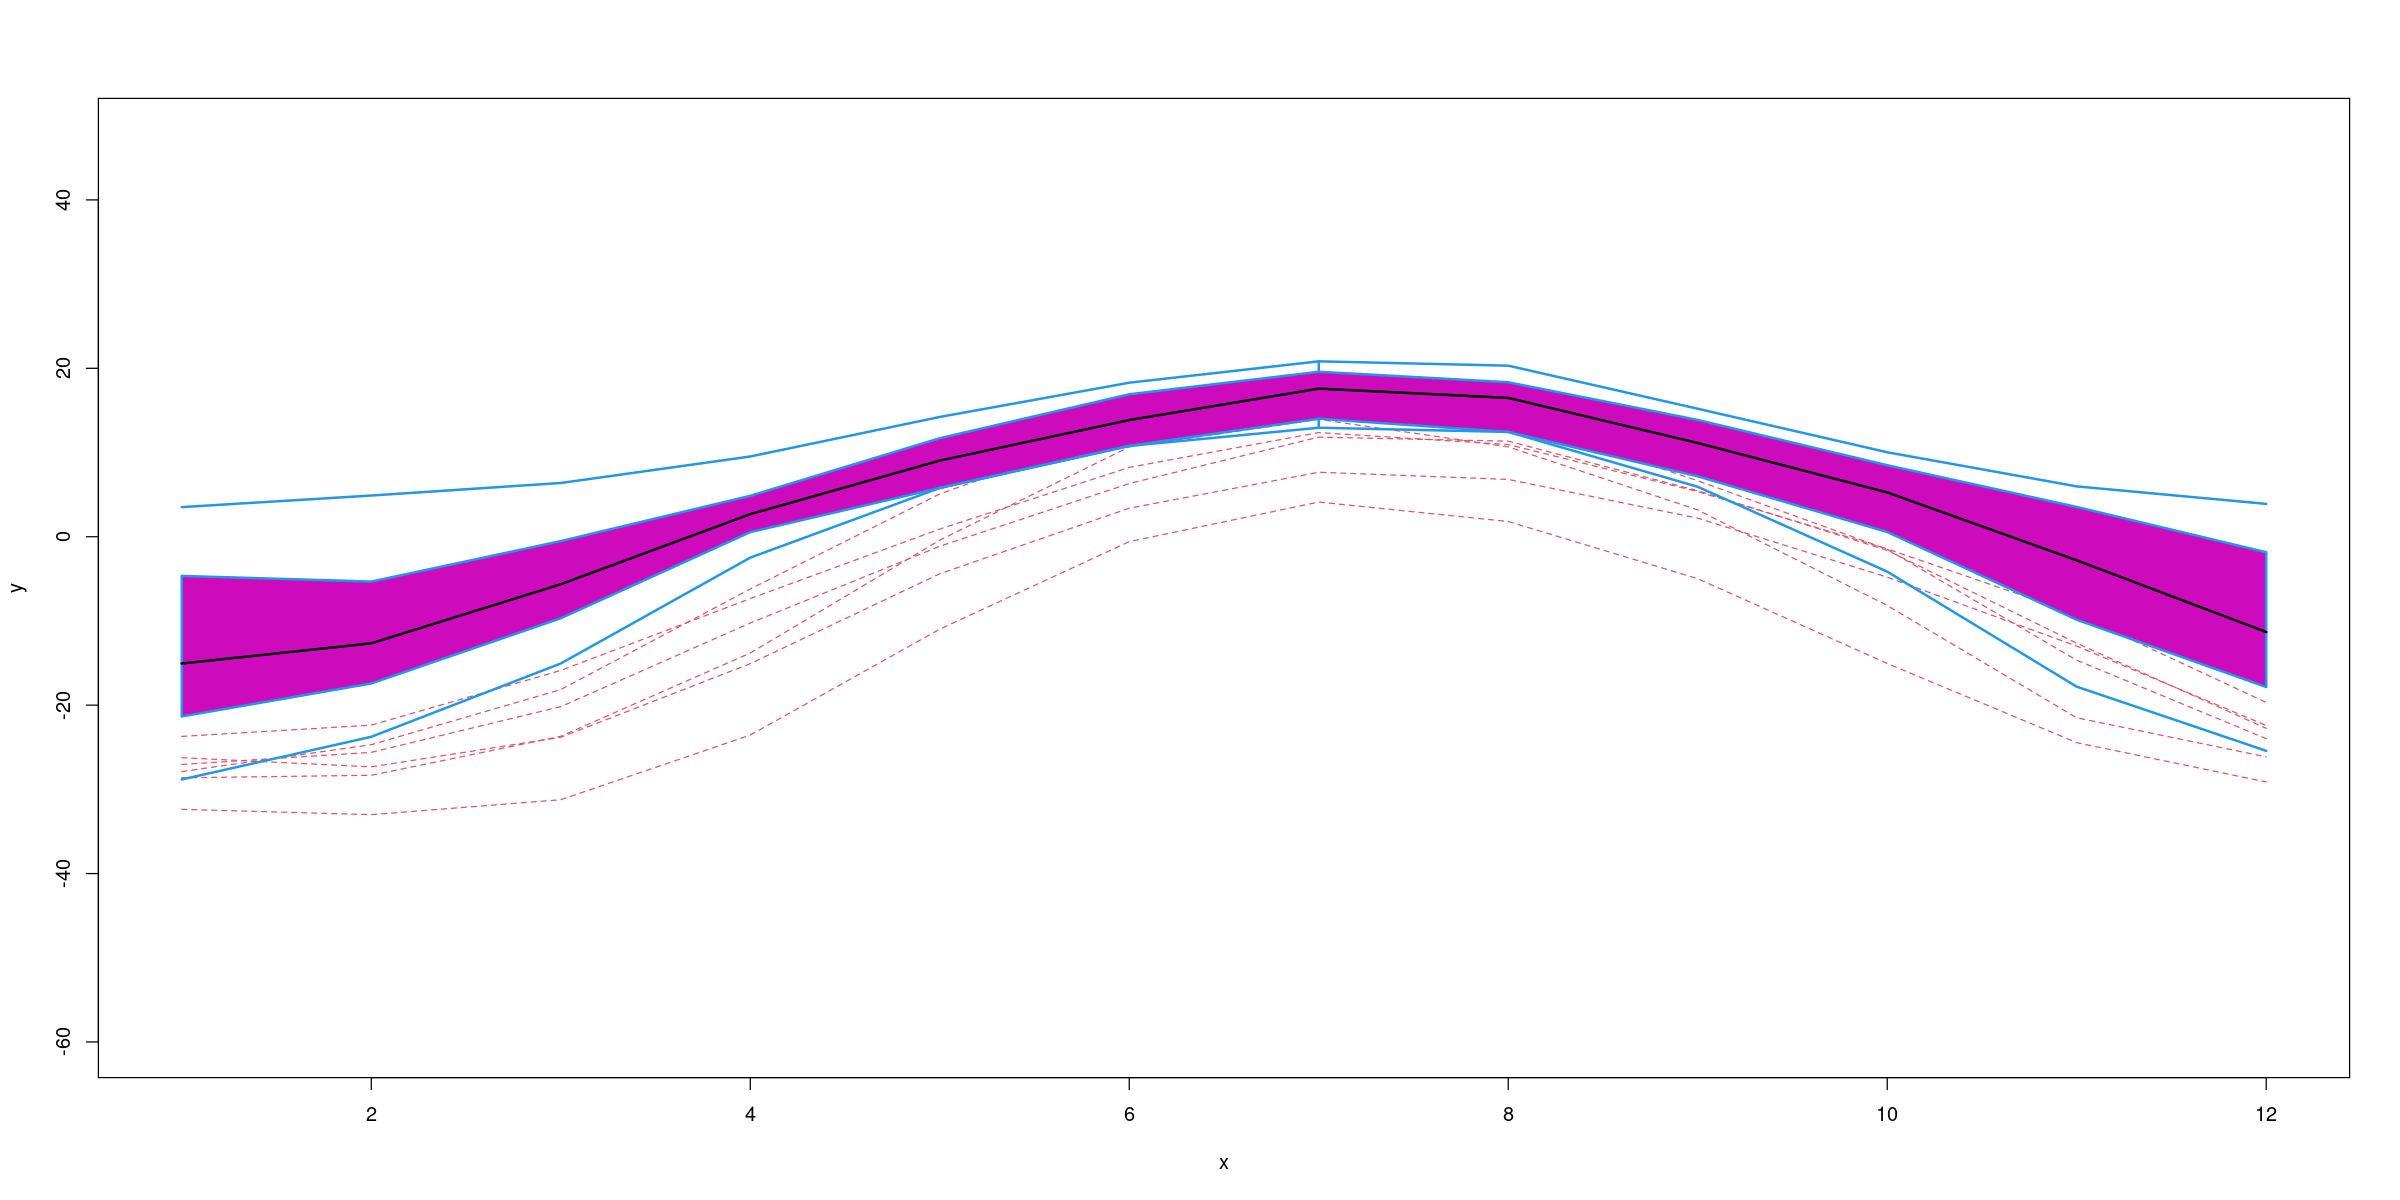

In [211]:
fbplot(X, 1:12)

### Ejercicio 1.3 (1.5 Kokoszka)

En R, las funciones son objetos de primera clase. En particular, esto quiere decir que una funcion puede devolver _otra_ funcion. Para nuestros operadores, que van de espacios de Hilbert a espacios de Hilbert, esta habilidad del lenguaje resulta muy conveniente.

In [ ]:
timesX <- function(x) {
    timesX_ <- function(y) {
        return(y * x)
    }
    return(timesX_)
}

In [ ]:
times3 <- timesX(3)

In [ ]:
times3(5)

In [ ]:
stopifnot(
    3 * 4 == timesX(3)(4),
    3 * 4 == timesX(3)(timesX(4)(1))
)

Las funciones de interes por ahora son el nucleo de covarianza de Matern $\gamma_\nu(s, t)$, y la funcion auxiliar $C$.

In [ ]:
make_CE <- function(nu, sigma) {
    if (nu <= 0)
        stop("Nu debe ser un escalar positivo")
    if (length(sigma) > 1 | sigma < 0)
        stop("Sigma debe ser un escalar no negativo")
    CE <- function(u) {
#         print(c(u, nu, sigma^2, 2^(1-nu), u^nu, besselK(u, nu), gamma(nu)))
        ifelse(
            u == 0,
            1,
            sigma^2 * 2^(1-nu) * u^nu * besselK(u, nu) / gamma(nu)
        )
    }
    return(CE)
}

make_kern <- function(nu, ro, sigma) {
    CE <- make_CE(nu, sigma)
    kern <- function(t, s) {
        return(CE(sqrt(2 * nu) * abs(s - t) / ro))
    }
    return(kern)
}

In [ ]:
# Repaso de descomposicio nde Cholesky
# Genero una matriz simetrica al azar
M <- matrix(rnorm(9), ncol = 3)
S <- M %*% t(M)
D <- chol(S)

stopifnot(max(t(D) %*% D - S) < 1e-10)
t(D)

In [ ]:
SEMILLA <- 1234
T <- 50  # tamaño de la grilla de evaluación
LIMITES <- c(0, 1)
GRILLA <- seq(LIMITES[1], LIMITES[2], length.out = T) 
N <- 100
MU <- vector("numeric", T)  # funcion de media
RO <- 1
SIGMA <- 1

Genero, para cada $\nu$,
- la funcion nucleo de covarianza `kern`,
- una muestra de `N` procesos iid,
- la funcion de media muestral `muhat`, y
- las matrices de covarianza verdadera (`matcov`) y estimada (`gammahat`) para una grilla esquiespaciada de `T` puntos.

Con estos datos, podemos realizar todos los graficos deseados.

In [ ]:
nus <- c(1, 4, 8) / 2
resultados <- list()
for (i in seq_along(nus)) {
    nu <- nus[i]
    print(nu)
    kern <- make_kern(nu, RO, SIGMA)
    matcov <- outer(GRILLA, GRILLA, kern)
    set.seed(SEMILLA)
    X <- rmvnorm(MU, matcov, N)
    muhat <- get_muhat(X)
    gammahat <- get_gammahat(X)

    resultados[[i]] <- list(
        kern=kern,
        nu=nu,
        matcov=matcov,
        X=X,
        muhat=muhat, 
        gammahat=gammahat
    )
}

Dado un elemento de la lista `resultados` recién generada, la siguiente función genera distintos gráficos de interés.

In [ ]:
plots <- function(r) {
    print(r$nu)
    partial <- function(t) { r$kern(t, 0.5) }
    plot.new()
    # Covarianza de distintos puntos con t=0,
    curve(partial, LIMITES[1], LIMITES[2])
    # Plots de contorno y perspectiva para la matriz de covarianza real y estimada
    contour(r$matcov)
    contour(r$gammahat)
    persp(r$matcov, theta=30)
    persp(r$gammahat, theta=30)
    filled.contour(r$matcov)
    filled.contour(r$gammahat)
    # Diferencia entre la matriz de covarianza real y estimada
    filled.contour(r$matcov - r$gammahat)
    print(mean((r$matcov - r$gammahat)^2))
    # 5 trayectorias de procesos
    plot(GRILLA, r$X[,1], 'l', ylim=c(-4, 4))
    for (j in seq.int(5)) {
        lines(GRILLA, r$X[,j], 'l')
    }
}

In [ ]:
plots(resultados[[1]])

In [ ]:
N_BASES <- 40 # debe ser estrictamente menor a T! por que? Probar con 50
base.bsplines <- create.bspline.basis(rangeval = LIMITES, nbasis = N_BASES, norder = 4)

In [ ]:
J <- 1  # indice de `resultados` a utilizar
resultado <- resultados[[J]]
X <- resultado$X
X.fd <- smooth.basis(GRILLA, X, base.bsplines)
matcov <- resultado$matcov
gammahat <- resultado$gammahat

### Componentes Principales

#### Componentes principales funcionales con `pca.fd`

In [ ]:
X.pca = pca.fd(X.fd$fd, nharm=4)
# plot(X.pca)

plot(X.pca$harmonics, lwd=3)
X.pca$varprop

#### Componentes principales "a mano" a partir de la muestra simulada

In [ ]:
pcaX <- prcomp(t(X))
m1 <- pcaX$rotation[,1:4] * sqrt(T - 1)  # Para que tengan norma en L2 == 1 (cuadrado-integren a 1)
pcaX$sdev[1:4]**2 / sum(pcaX$sdev**2)
matplot(GRILLA, m1, type='l', xlab='t', ylab='f(t)', col=1:5)
lines(GRILLA, rep(0, T), lty=2)
legend('bottomright', inset=.05, legend=colnames(m1), 
                            pch=1, horiz=TRUE, col=1:5)


#### Componenes principales de la matriz de covarianza $\Gamma$ a partir de sus autoelementos

In [ ]:
eig <- eigen(matcov)

In [ ]:
stopifnot(max(matcov %*% eig$vectors[,1] - eig$values[1]  * eig$vectors[,1]) < 1e-10)

In [ ]:
m1 <- eig$vectors[,1:4] * sqrt(T - 1) * matrix(rep(c(-1, 1 , 1, 1), T), byrow=T, nrow=T) 
# for (i in c(1, 2, 3)) {
#     m1[,i] <- -m1[,i]  #Cambio de signo de ciertas autofunciones
# }
matplot(GRILLA, m1, type='l', xlab='Years', ylab='rate', col=1:5)
lines(GRILLA, rep(0, T), lty=2)
legend('bottomright', inset=.05, legend=c("PC1", "PC2", "PC3", "PC4"), 
                            pch=1, horiz=TRUE, col=1:5)

#### Componenes principales de la matriz de covarianza estimada $\hat\Gamma$ a partir de sus autoelementos

In [ ]:
eig <- eigen(gammahat)

In [ ]:
stopifnot(max(gammahat %*% eig$vectors[,1] - eig$values[1]  * eig$vectors[,1]) < 1e-10)

In [ ]:
m1 <- eig$vectors[,1:4] * sqrt(T - 1) * matrix(rep(c(1, -1 , 1, 1), T), byrow=T, nrow=T) 
for (i in c(1, 2, 3)) {
    m1[,i] <- -m1[,i]  #Cambio de signo de ciertas autofunciones
}
matplot(GRILLA, m1, type='l', xlab='Years', ylab='rate', col=1:5)
lines(GRILLA, rep(0, T), lty=2)
legend('bottomright', inset=.05, legend=c("PC1", "PC2", "PC3", "PC4"), 
                            pch=1, horiz=TRUE, col=1:5)

### Derivadas Primeras

#### Usando `deriv.fd`

Ploteamos las derivadas de las primeras cinco observaciones juntas

In [ ]:
X.deriv <- deriv.fd(X.fd$fd, 1)
plot(X.deriv[1:5], xlim=LIMITES)

Y ploteamos una observacion (en negro) junto a su derivada primera (en azul) para confirmar la "correctitud" general

In [ ]:
plot(X.fd$fd[1], ylim = range(X.fd$fd[1]$coefs))
lines(GRILLA, rep(0, T), lty=2)
lines(X.deriv[1], col="blue")

#### Calculadas "a mano" numericamente

In [ ]:
X.deriv_num <- (X[2:T,] - X[1:(T-1),]) / ((LIMITES[2] - LIMITES[1]) / (T - 1))
# X.deriv_num[,1]
# plot(GRILLA, X[,1] , 'l')
matplot(GRILLA[2:T], X.deriv_num[,1:5], type='l', xlab='Years', ylab='rate', col=1:5)
legend('bottomright', inset=.05, legend=c("PC1", "PC2", "PC3", "PC4"), 
                            pch=1, horiz=TRUE, col=1:5)# lines(GRILLA, X[,1] , 'l', xlim=LIMITES, col='blue')
lines(GRILLA, rep(0, T), lty=2)

In [ ]:
plot(GRILLA, X[,1] , 'l', ylim = range(X[,1]))
lines(GRILLA, rep(0, T), lty=2)
lines(GRILLA[2:T], X.deriv_num[,1], col="blue")

### RGL: Graficos 3D interactivos

Todo robado de este primer link:
- http://www.sthda.com/english/wiki/a-complete-guide-to-3d-visualization-device-system-in-r-r-software-and-data-visualization#rgl_init-a-custom-function-to-initialize-rgl-device
- https://rpubs.com/vaungles/481700

In [ ]:
library(rgl)
source("scripts/rglutils.R")
# options(rgl.printRglwidget = TRUE)

Un ejemplo con `iris`

In [ ]:
data(iris)
head(iris)

x <- sep.l <- iris$Sepal.Length
y <- pet.l <- iris$Petal.Length
z <- sep.w <- iris$Sepal.Width

In [ ]:
rgl_init()
rgl.spheres(x, y, z, r = 0.2, 
          color = get_colors(iris$Species)) 
rgl_add_axes(x, y, z, show.bbox = FALSE)
# This writes a copy into temporary directory 'webGL',
# and then displays it
browseURL(
  paste("file://", writeWebGL(dir=file.path(tempdir(), "webGL"), 
  width=500), sep="")
  )

In [ ]:
rgl_init()
z <- resultados[[1]]$gammahat
nbcol = 100
color = rev(rainbow(nbcol, start = 0/6, end = 4/6))
zcol  = cut(z, nbcol)
persp3d(GRILLA, GRILLA, z, col=color[zcol])
DIR = "webGL"
writeWebGL(DIR, filename = file.path(DIR, "gammahat.html"), width = 960)

In [ ]:
rgl_init()
z <- resultados[[1]]$matcov
nbcol = 100
color = rev(rainbow(nbcol, start = 0/6, end = 4/6))
zcol  = cut(z, nbcol)
persp3d(GRILLA, GRILLA, z, col=color[zcol])
DIR = "webGL"
writeWebGL(DIR, filename = file.path(DIR, "matcov.html"), width = 960)